    Jacob Knopping
    2/25/2020
    
    26.5 Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

__1) Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.__

In [5]:
#Create a function that builds model and outputs a plot
def dbscan_cluster(eps, min_samples, X_std):
    #Fit model using parameters
    parameters = {
        'eps': eps,
        'min_samples': min_samples
    }
    clusters = DBSCAN(**parameters).fit_predict(X_std)
    
       #Plot first two principal components
    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
    #print("Adjusted Rand Index of the DBSCAN solution: {}"
    #  .format(metrics.adjusted_rand_score(y, clusters)))
    #print("The silhouette score of the DBSCAN solution: {}"
    #  .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

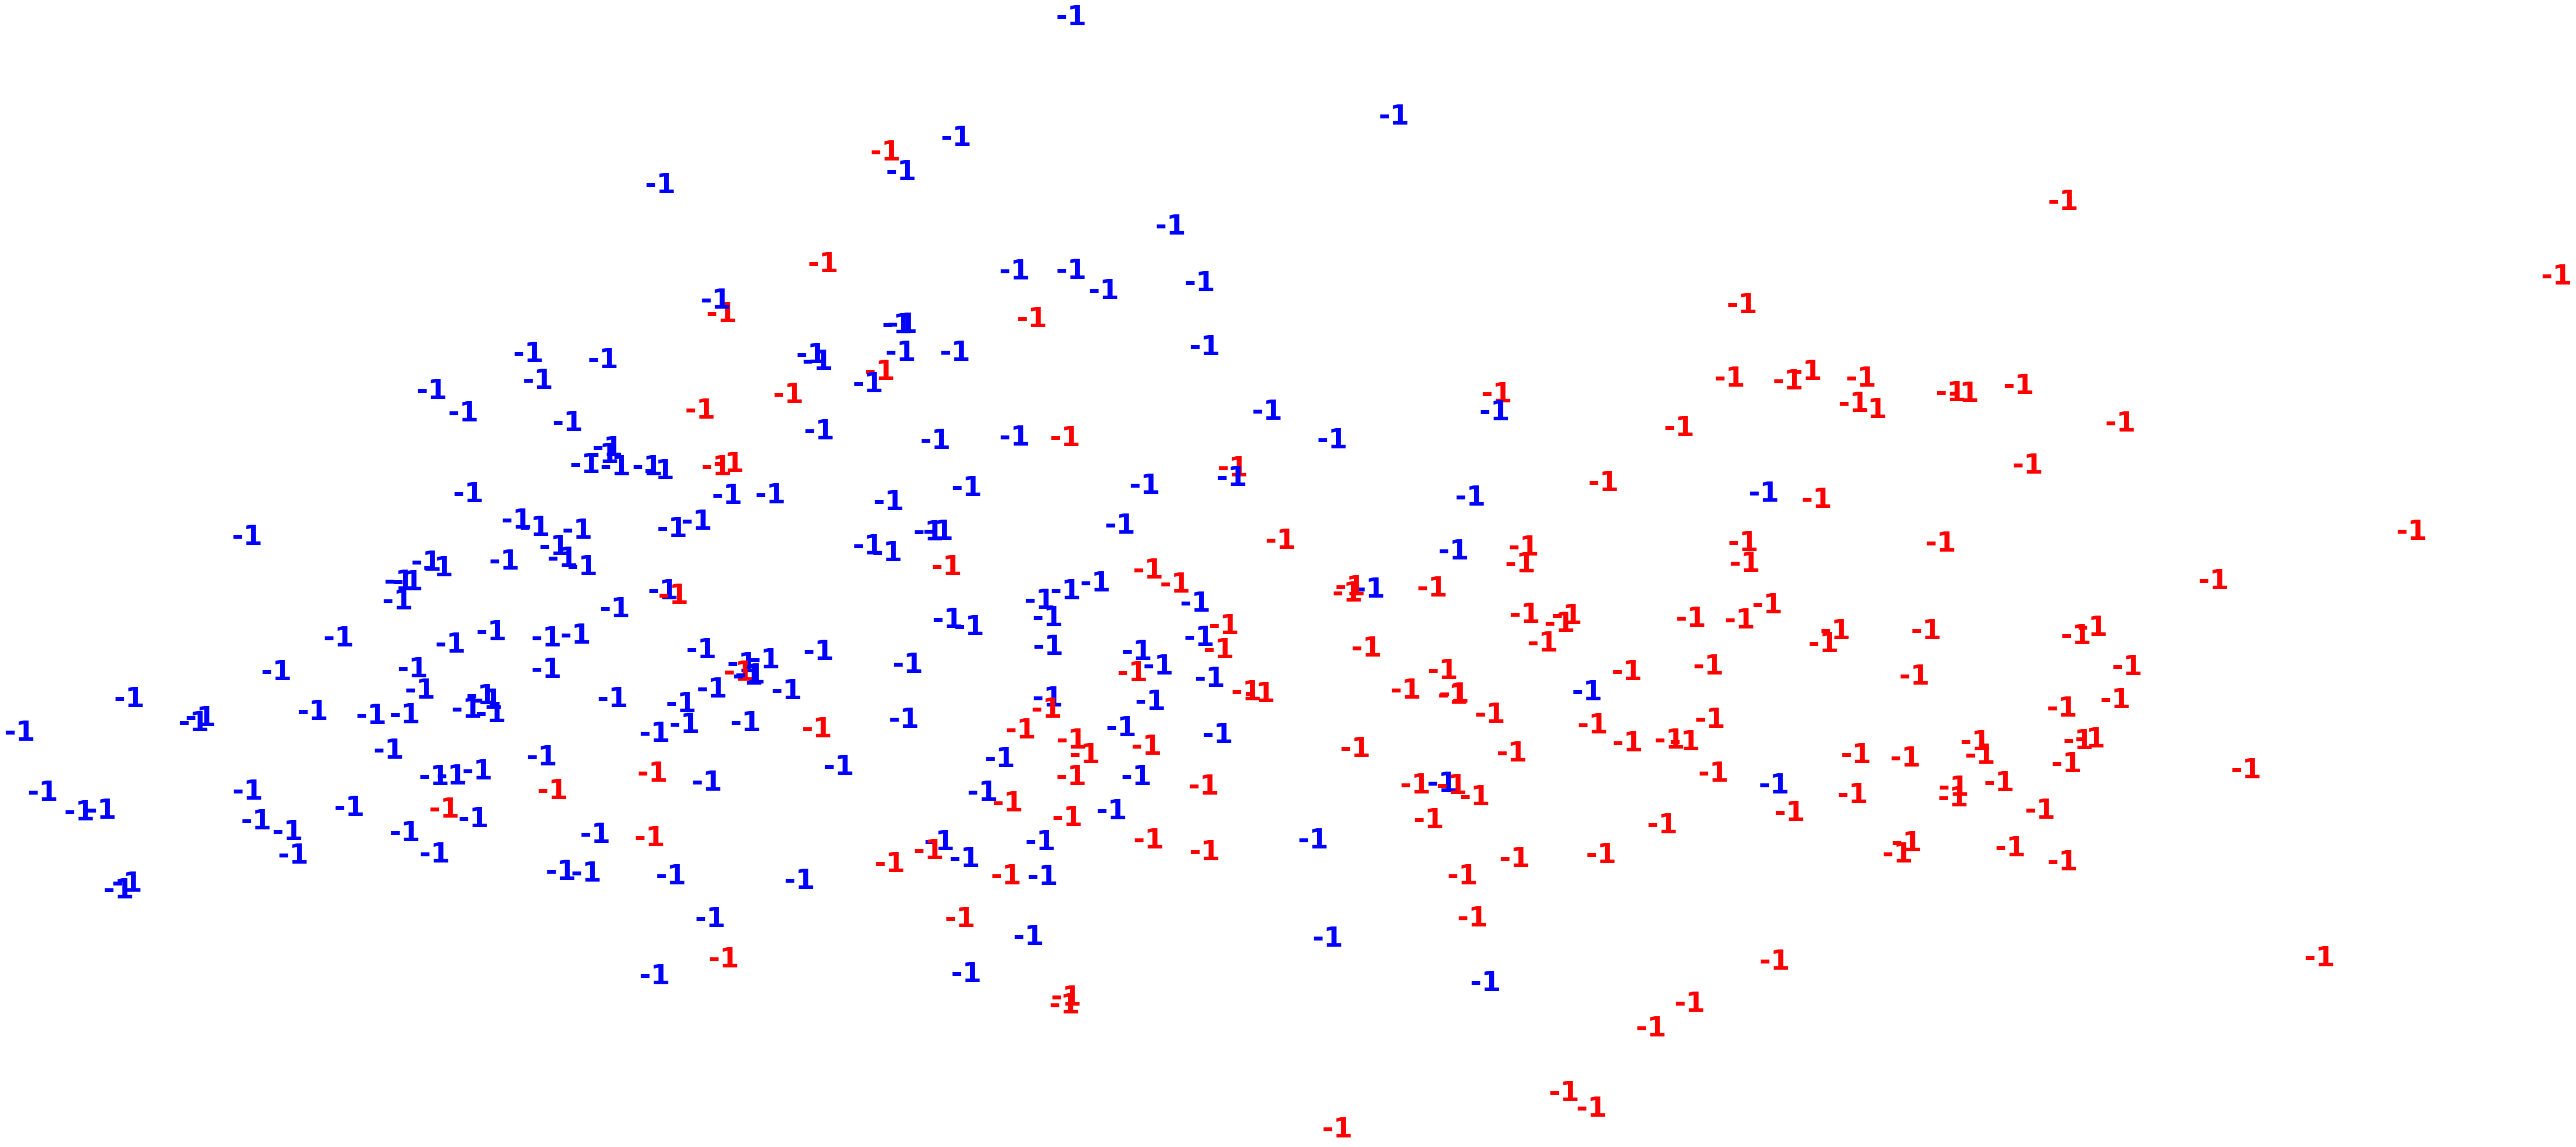

In [6]:
dbscan_cluster(.5, 3, X_std)

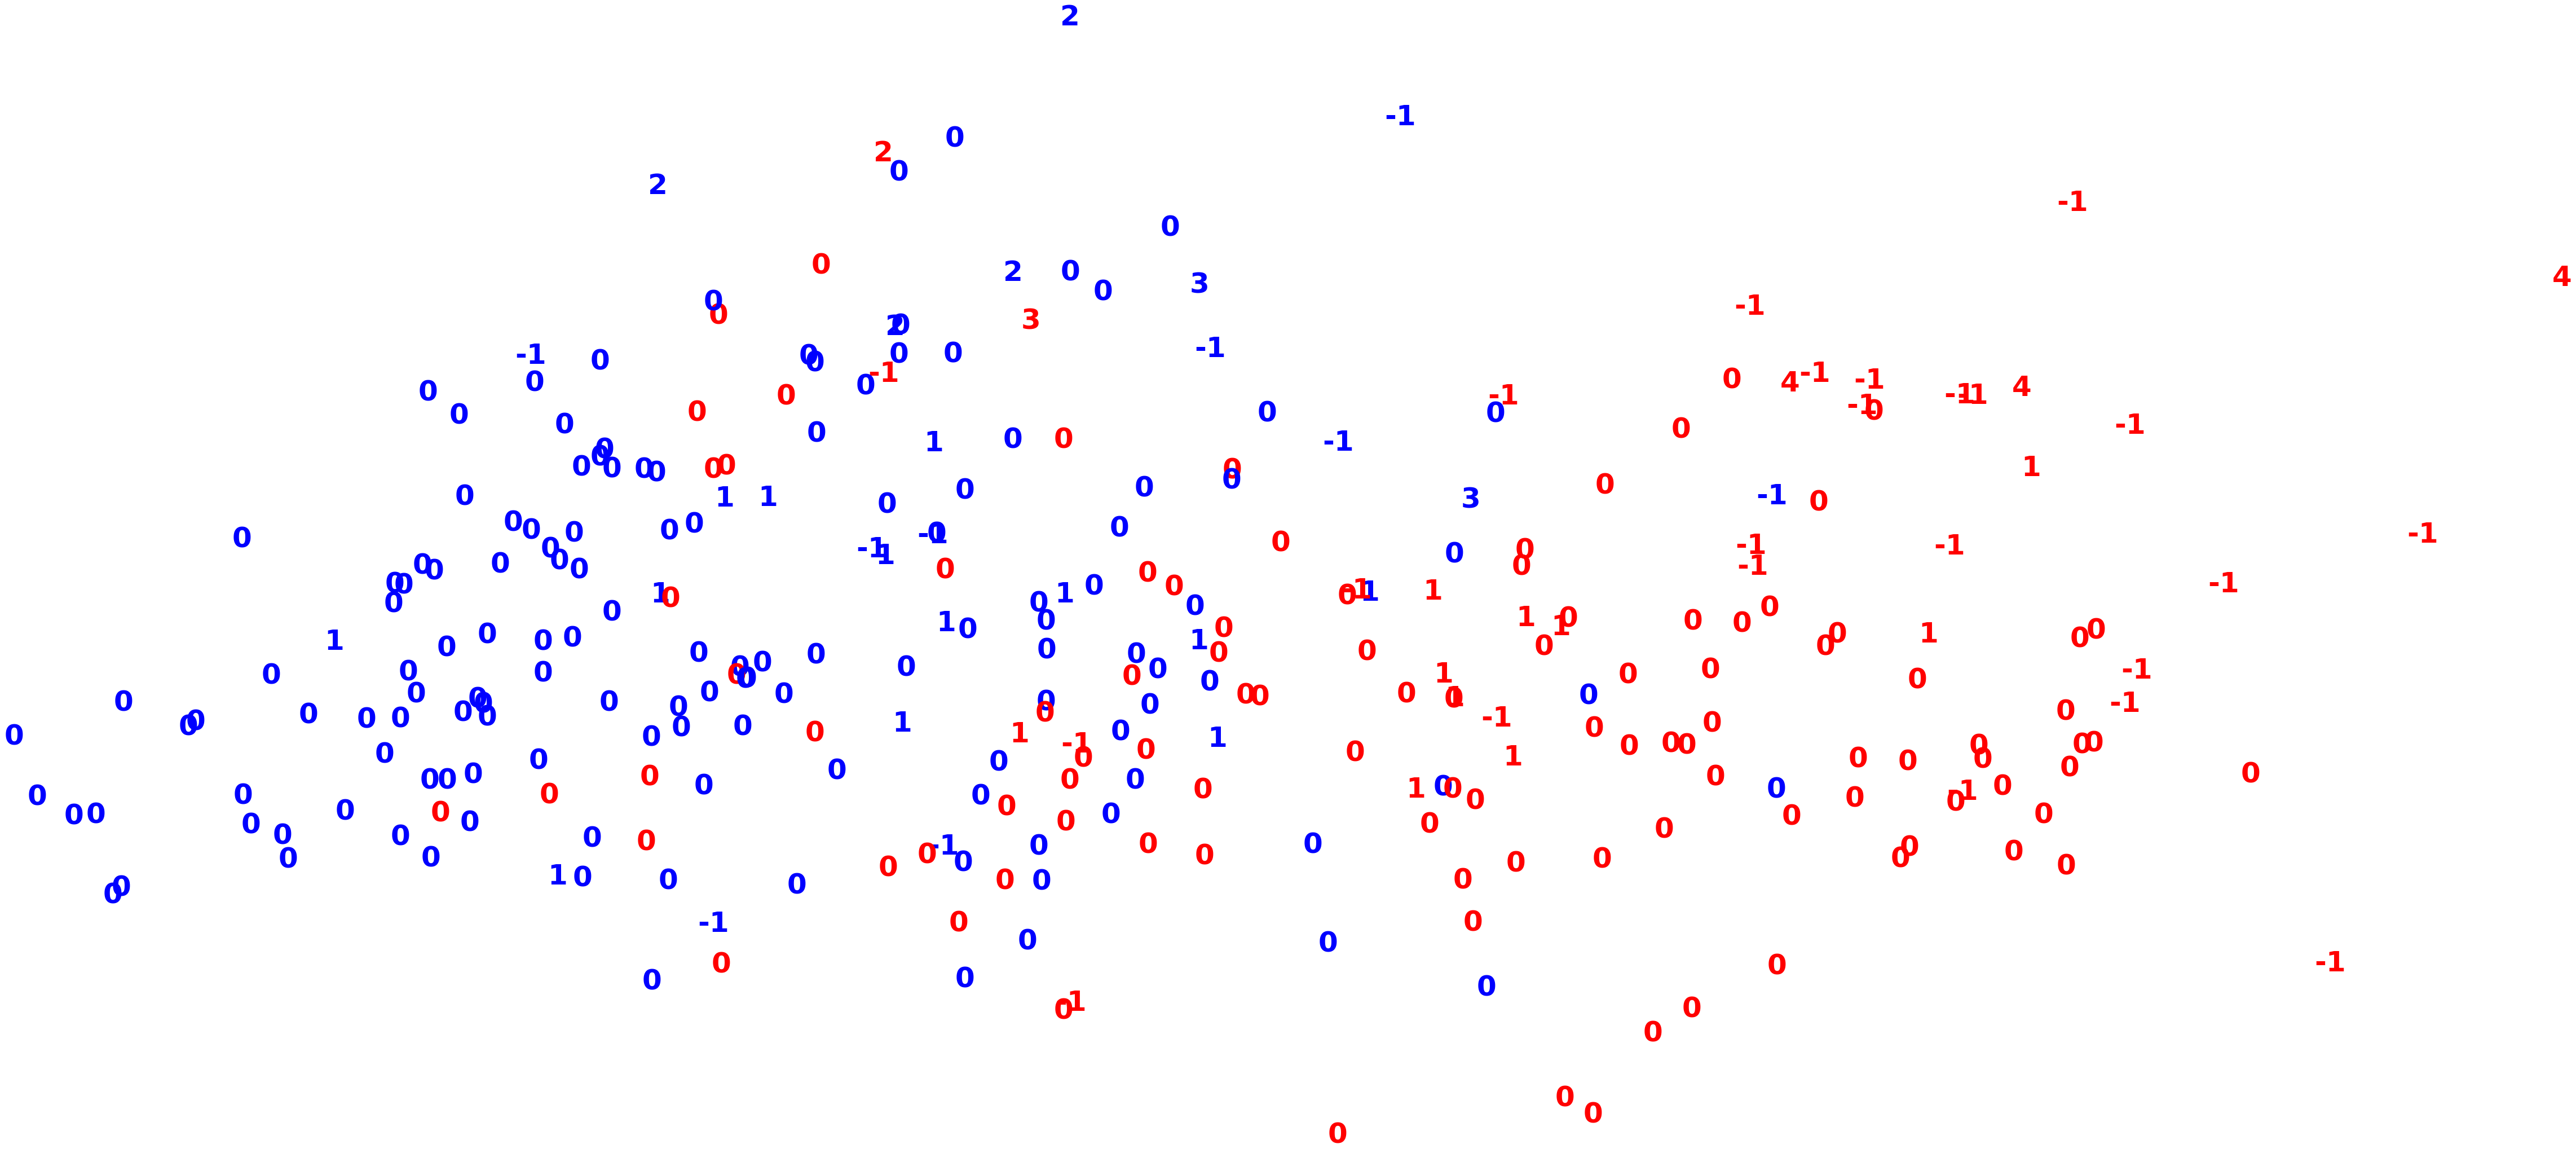

In [7]:
dbscan_cluster(3, 3, X_std)

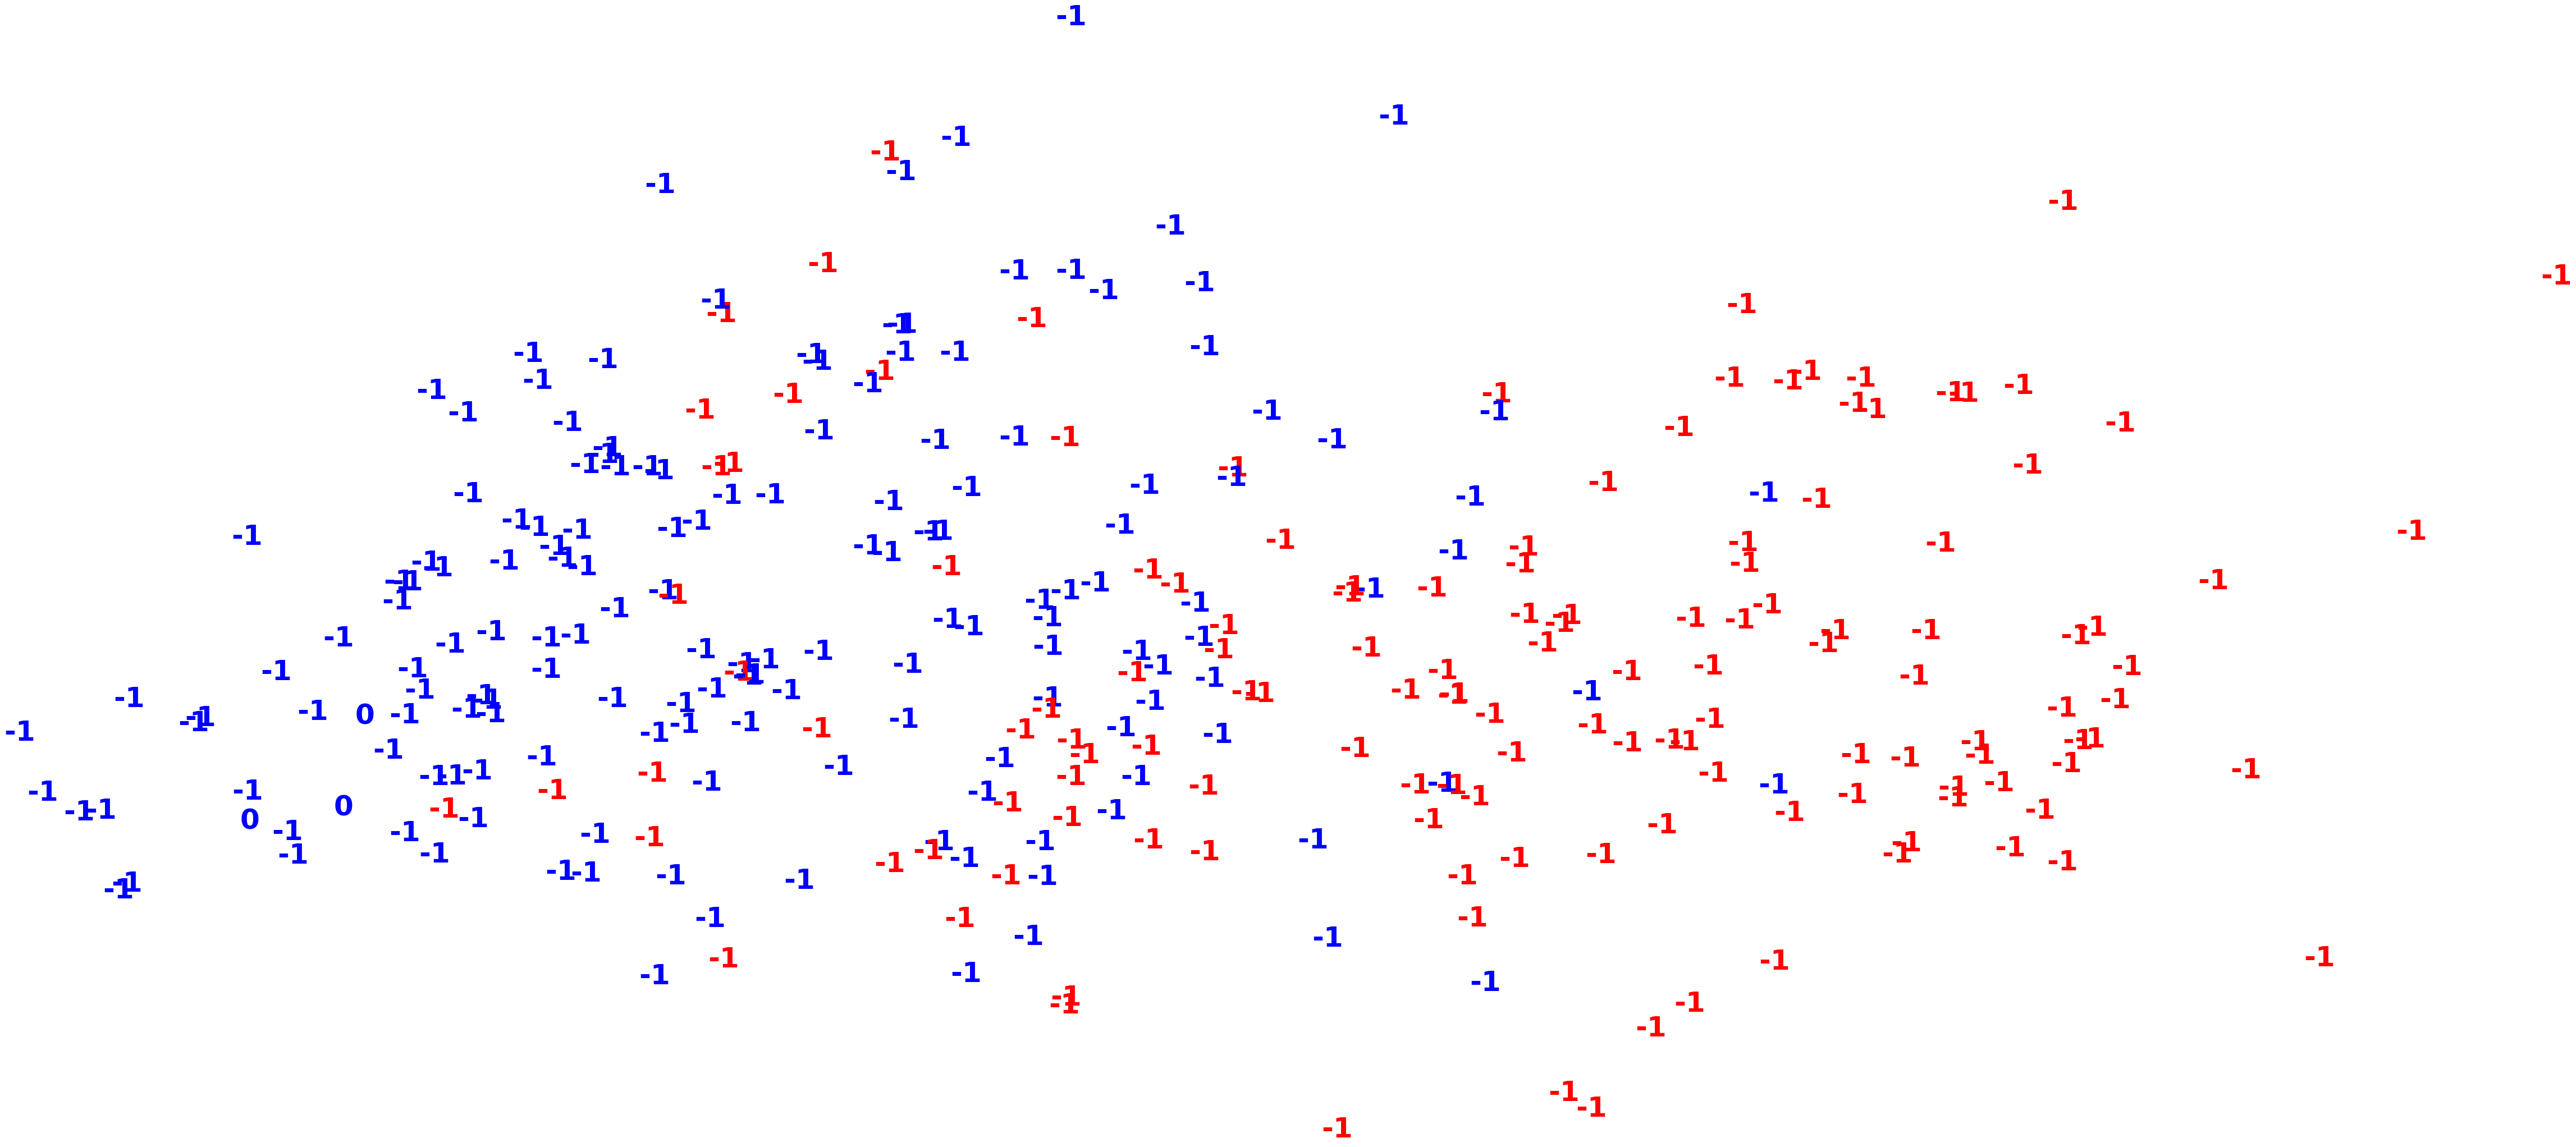

In [8]:
dbscan_cluster(1, 3, X_std)

__2) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?__

In [9]:
#Add metric to parameters
def dbscan_cluster(eps, min_samples, metric, X_std):
    #Fit model using parameters
    parameters = {
        'eps': eps,
        'min_samples': min_samples,
        'metric': metric
    }
    clusters = DBSCAN(**parameters).fit_predict(X_std)
    
    #Plot first two principal components
    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
    #Add counter for number of clusters
    print("# of clusters: ", len(np.unique(clusters)))

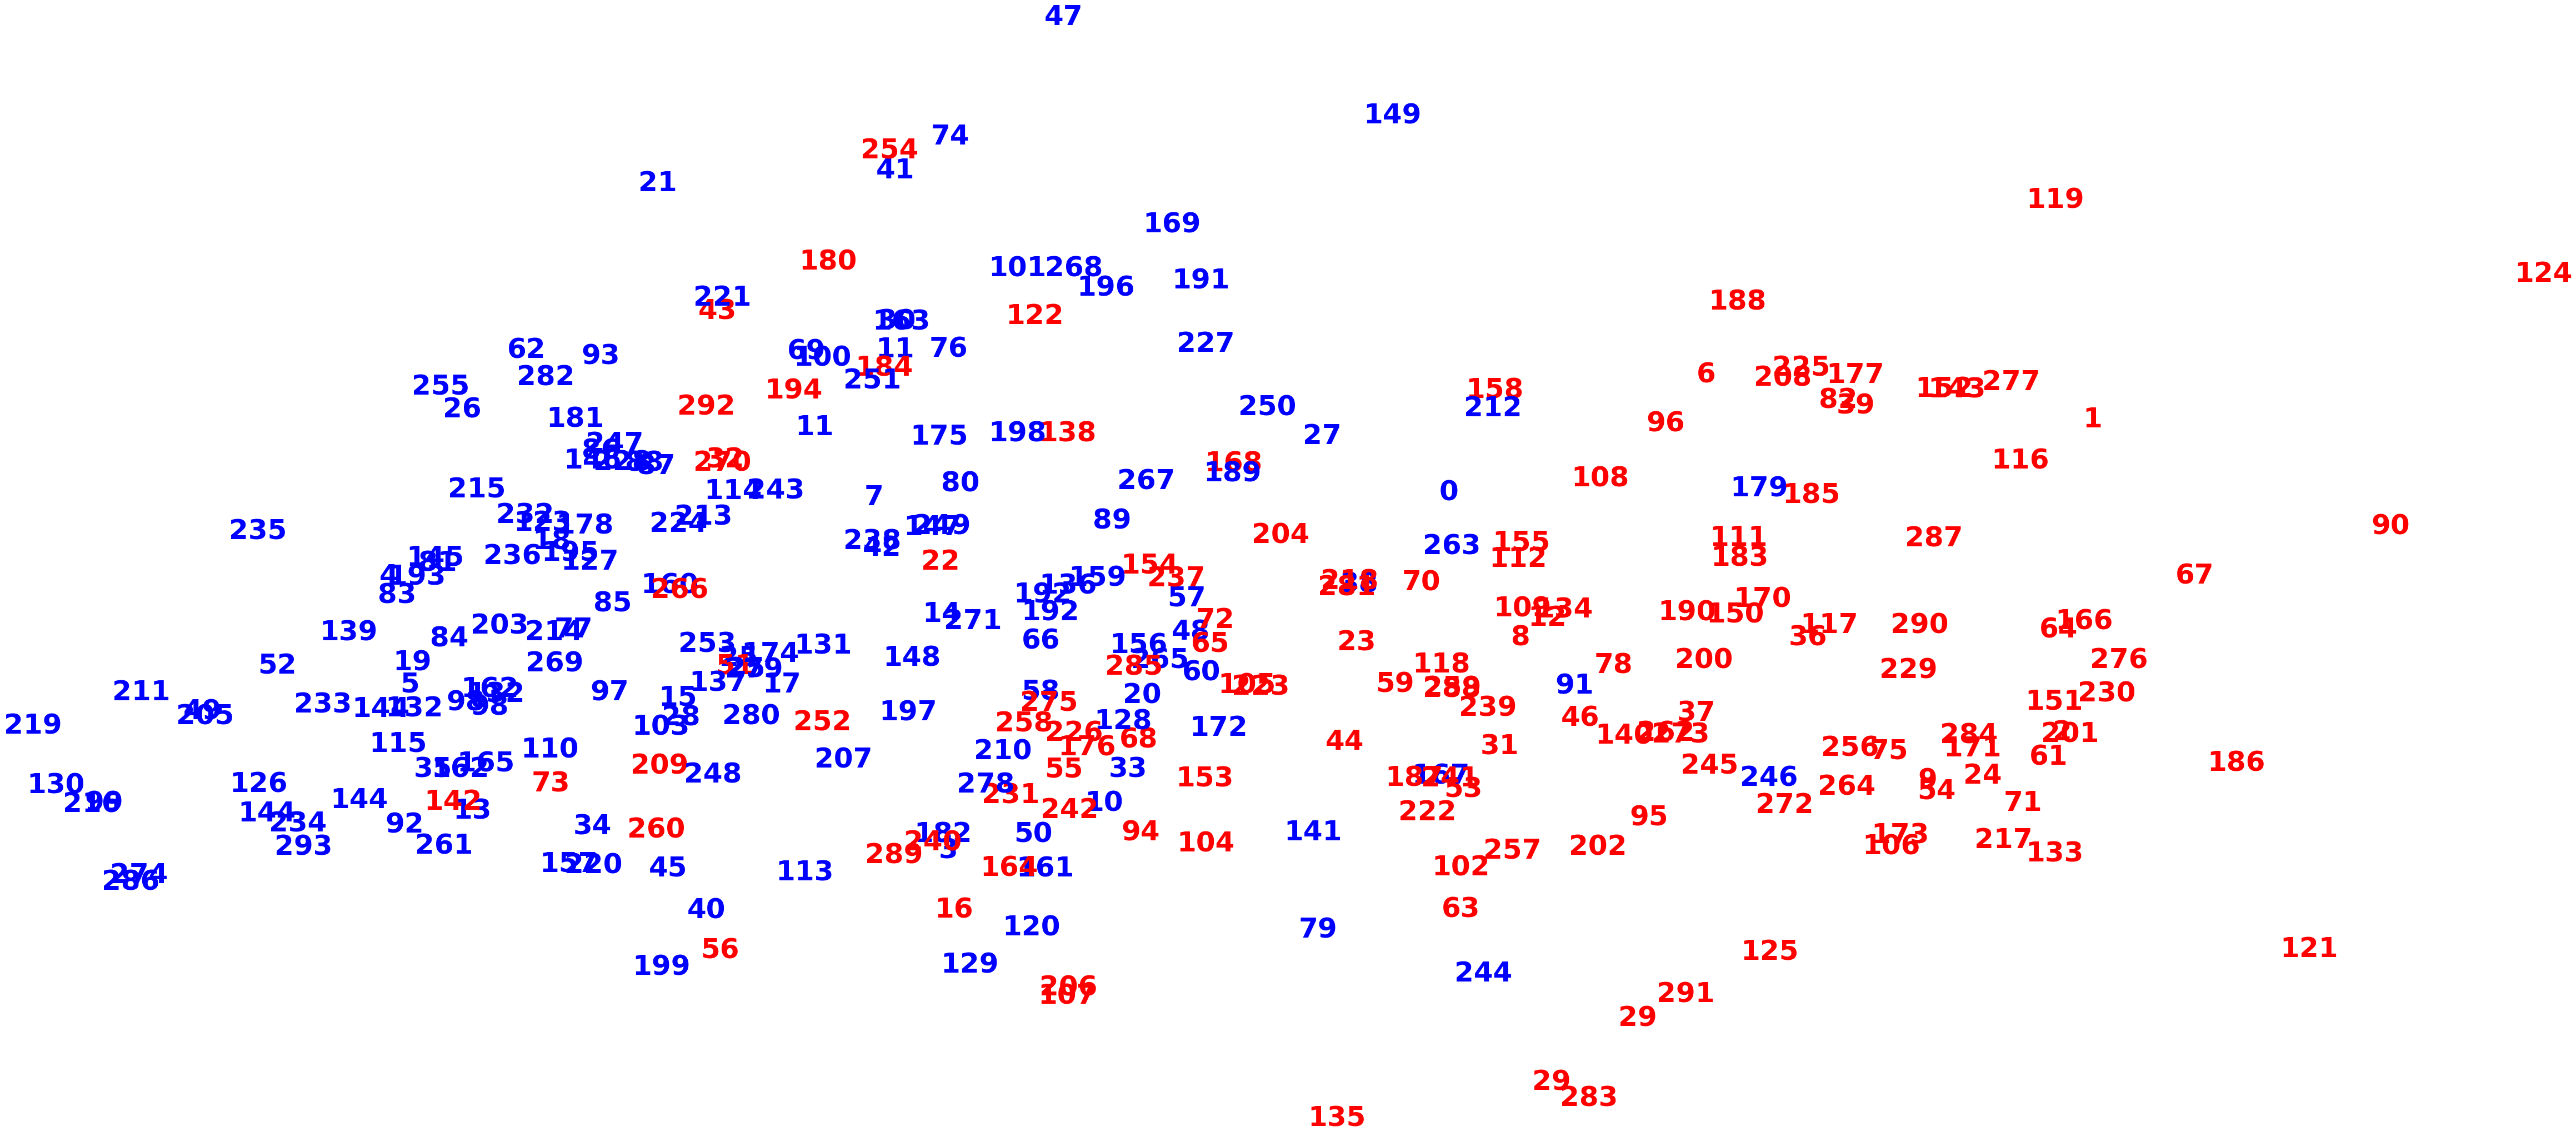

# of clusters:  294


In [10]:
#min_samples = 1
dbscan_cluster(1, 1, 'euclidean', X_std)

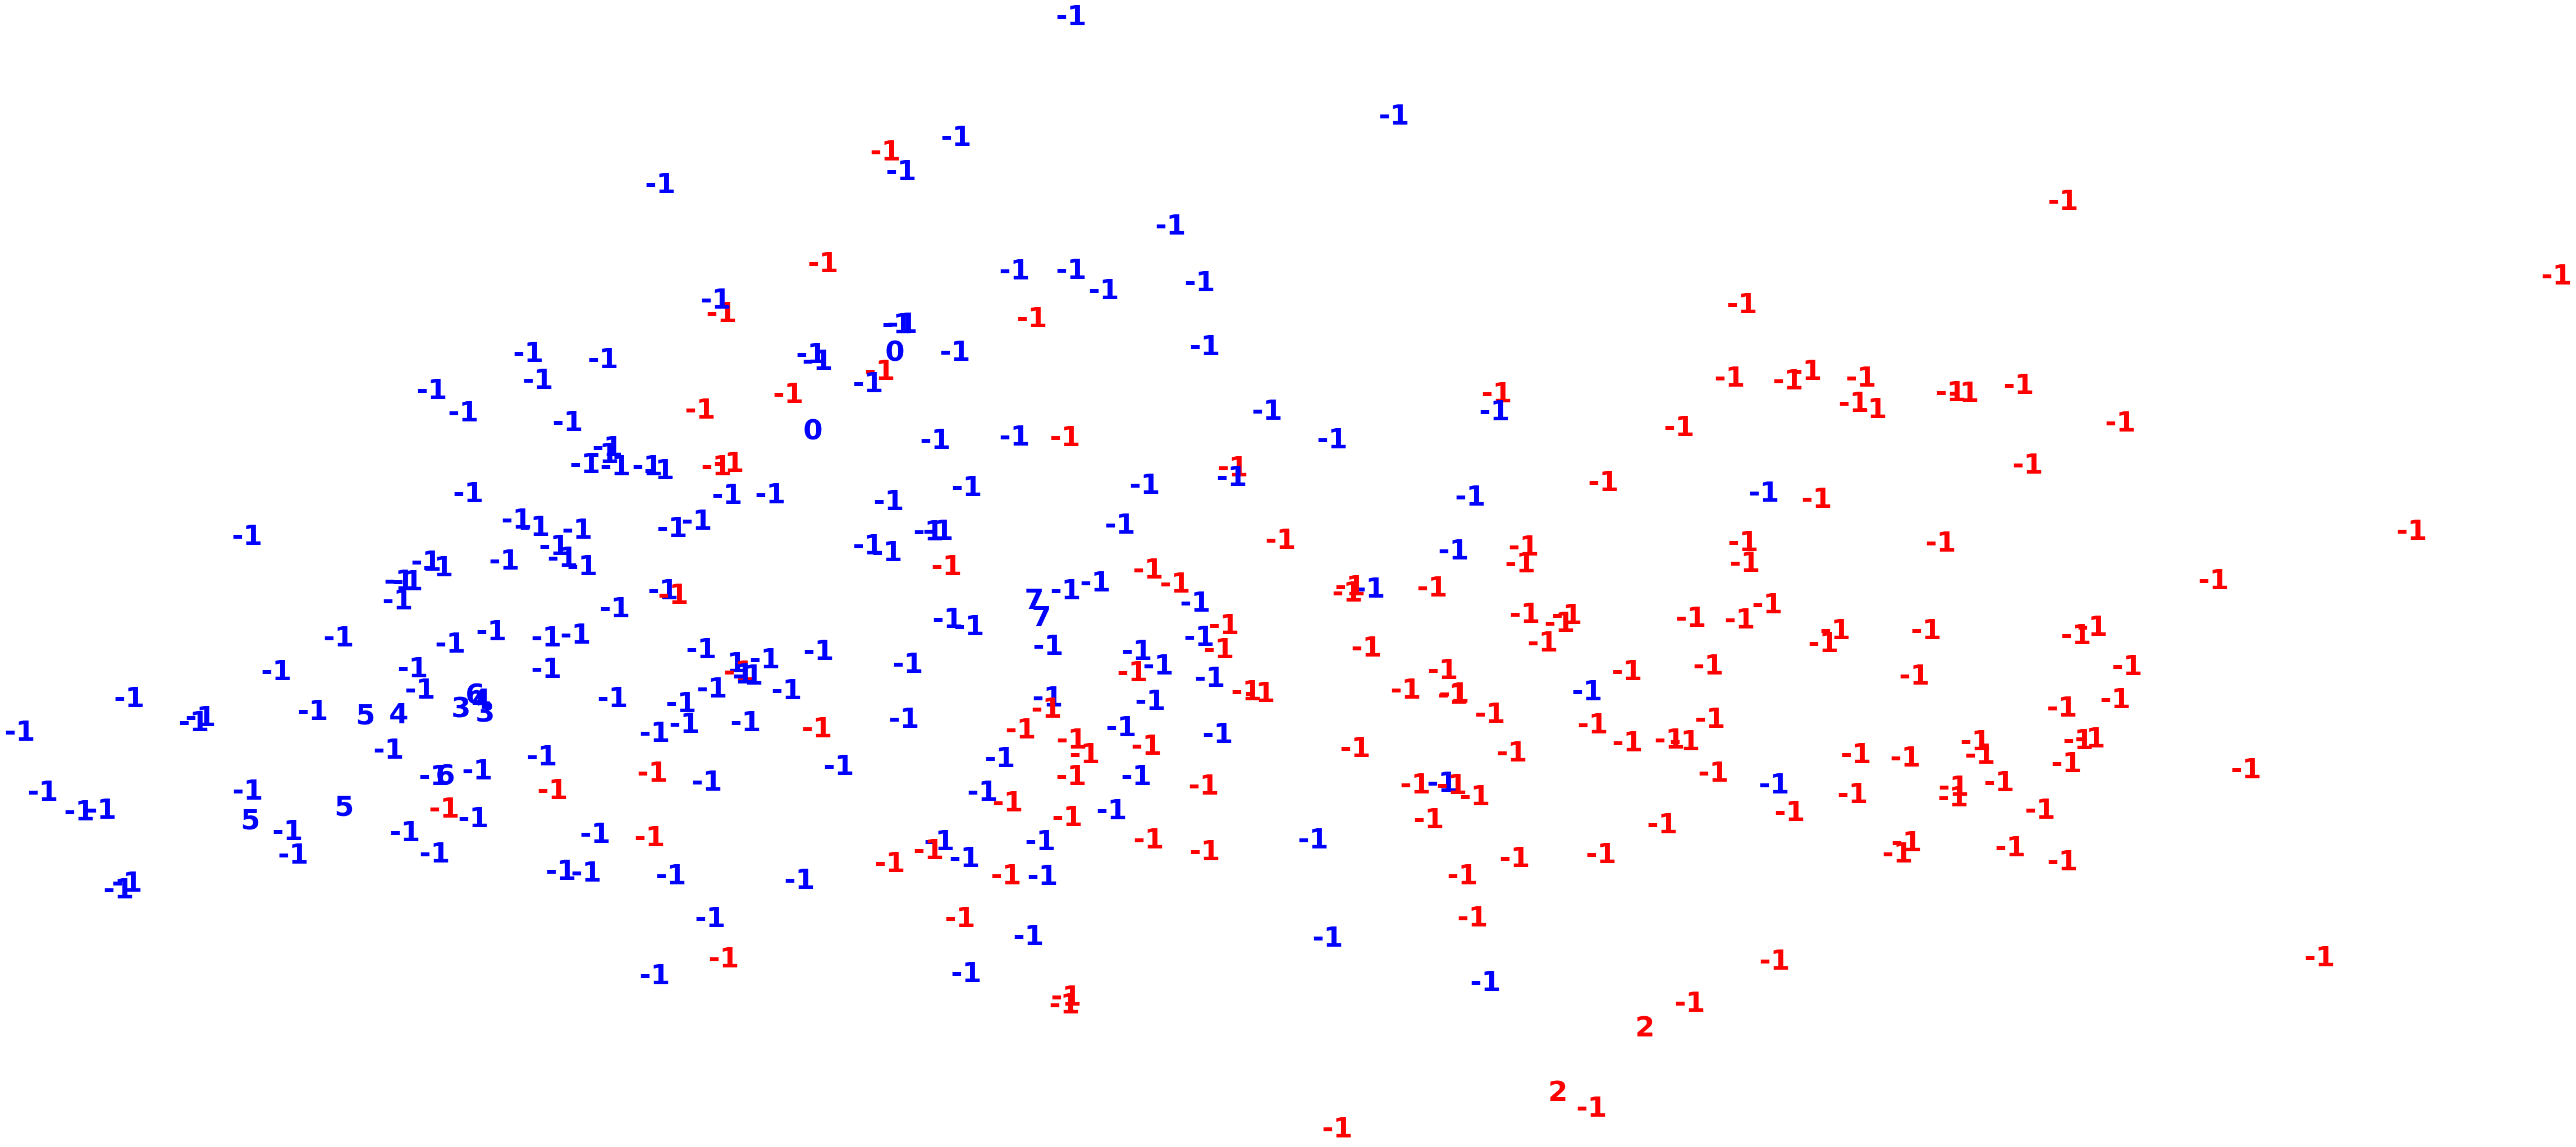

# of clusters:  9


In [11]:
#min_samples = 2
dbscan_cluster(1, 2, 'euclidean', X_std)

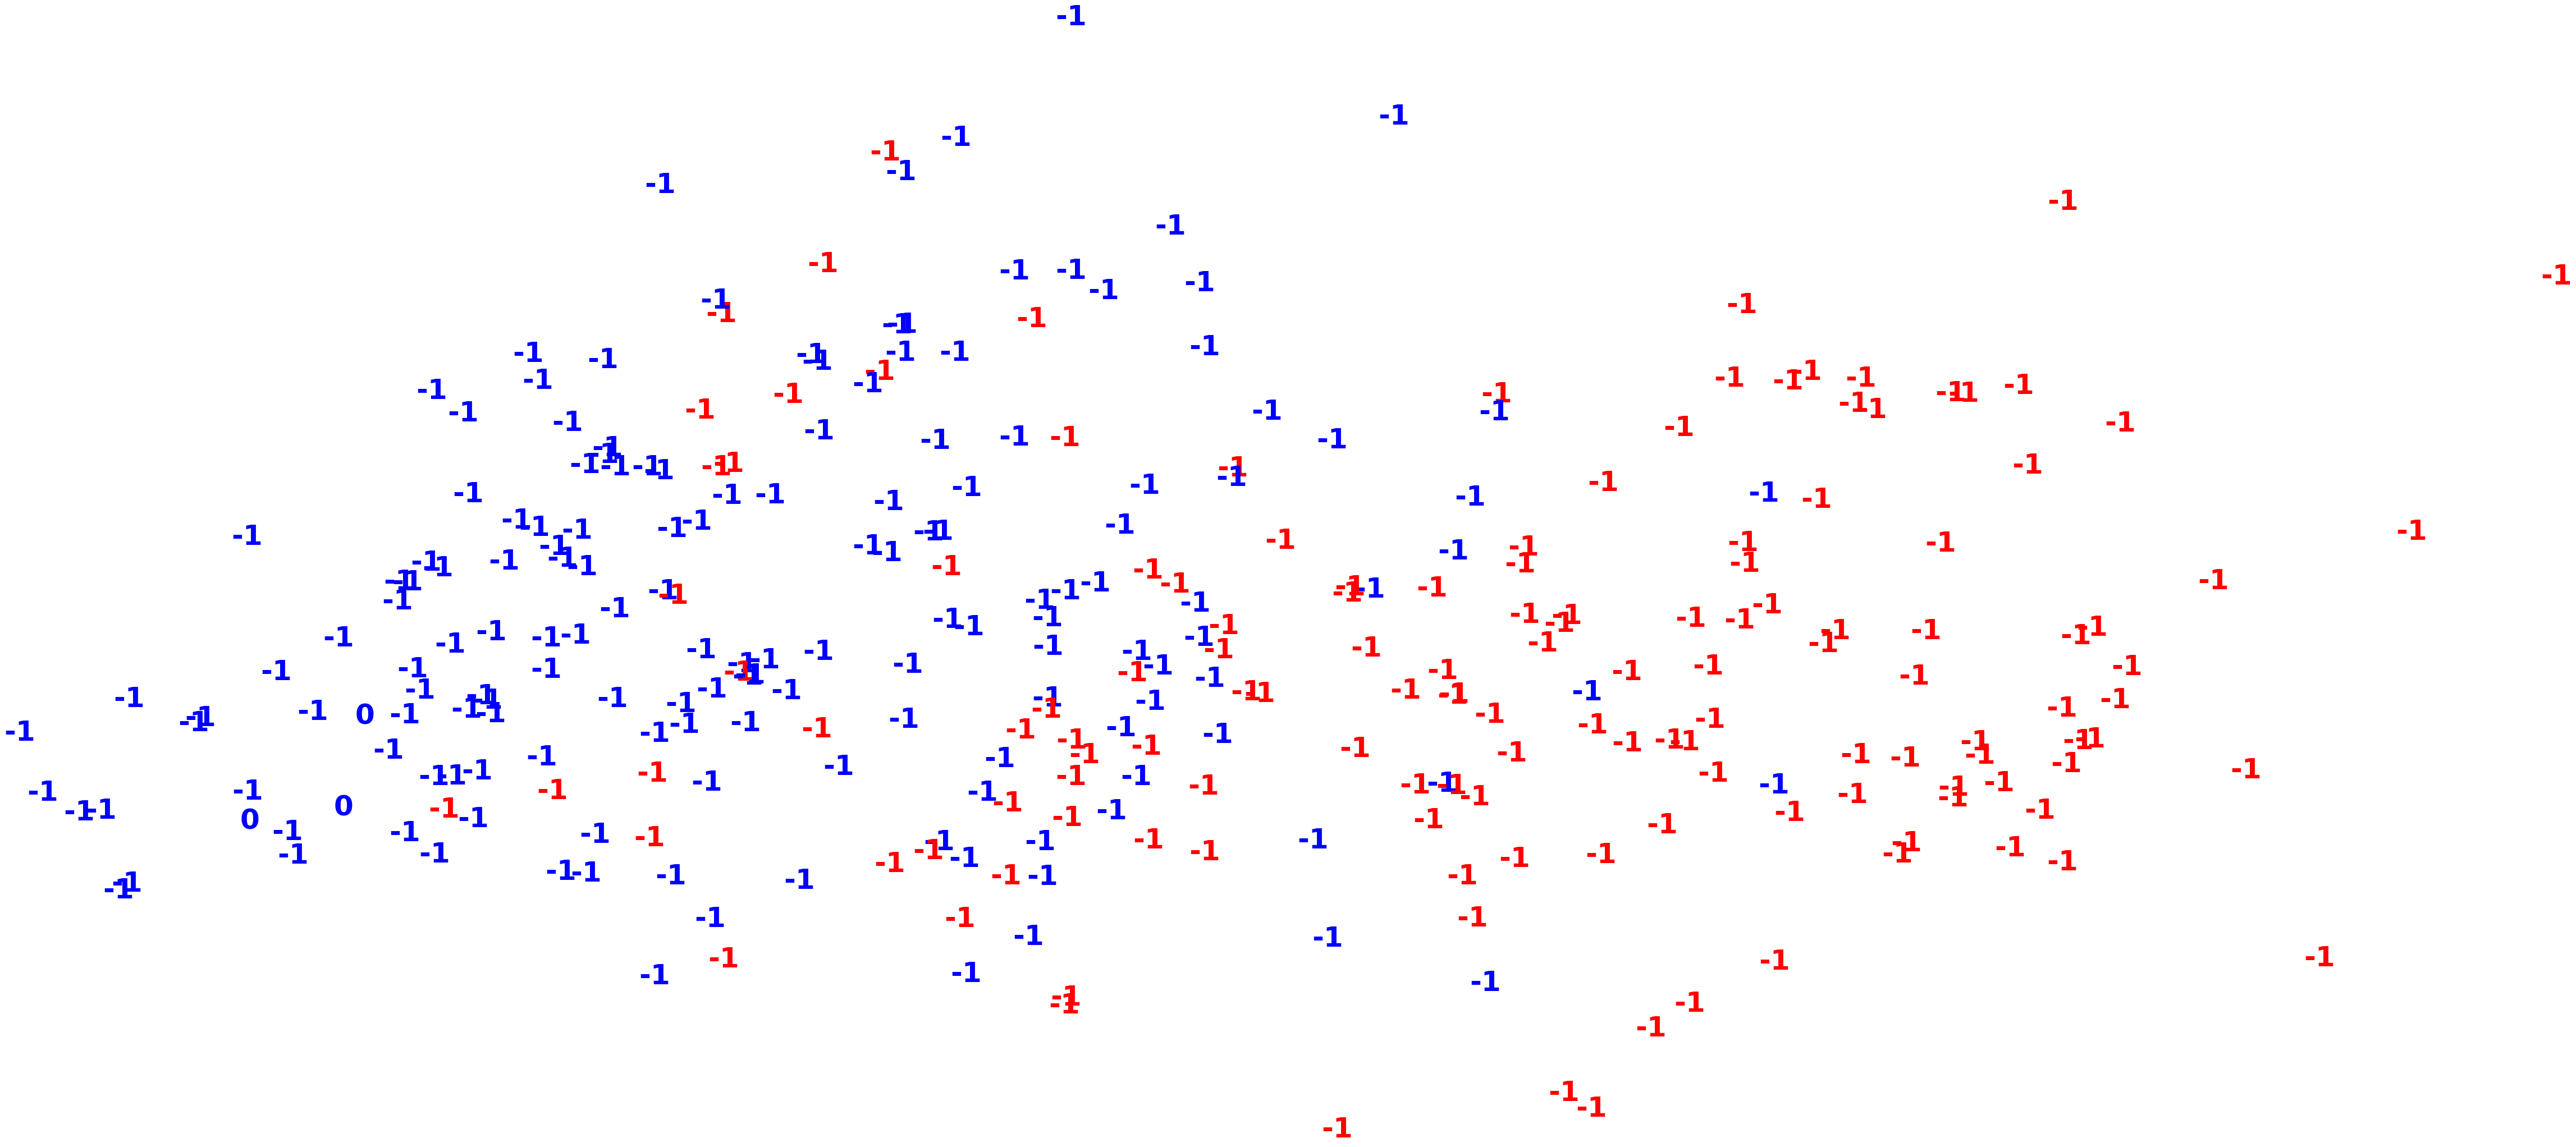

# of clusters:  2


In [12]:
#min_samples = 3
dbscan_cluster(1, 3, 'euclidean', X_std)

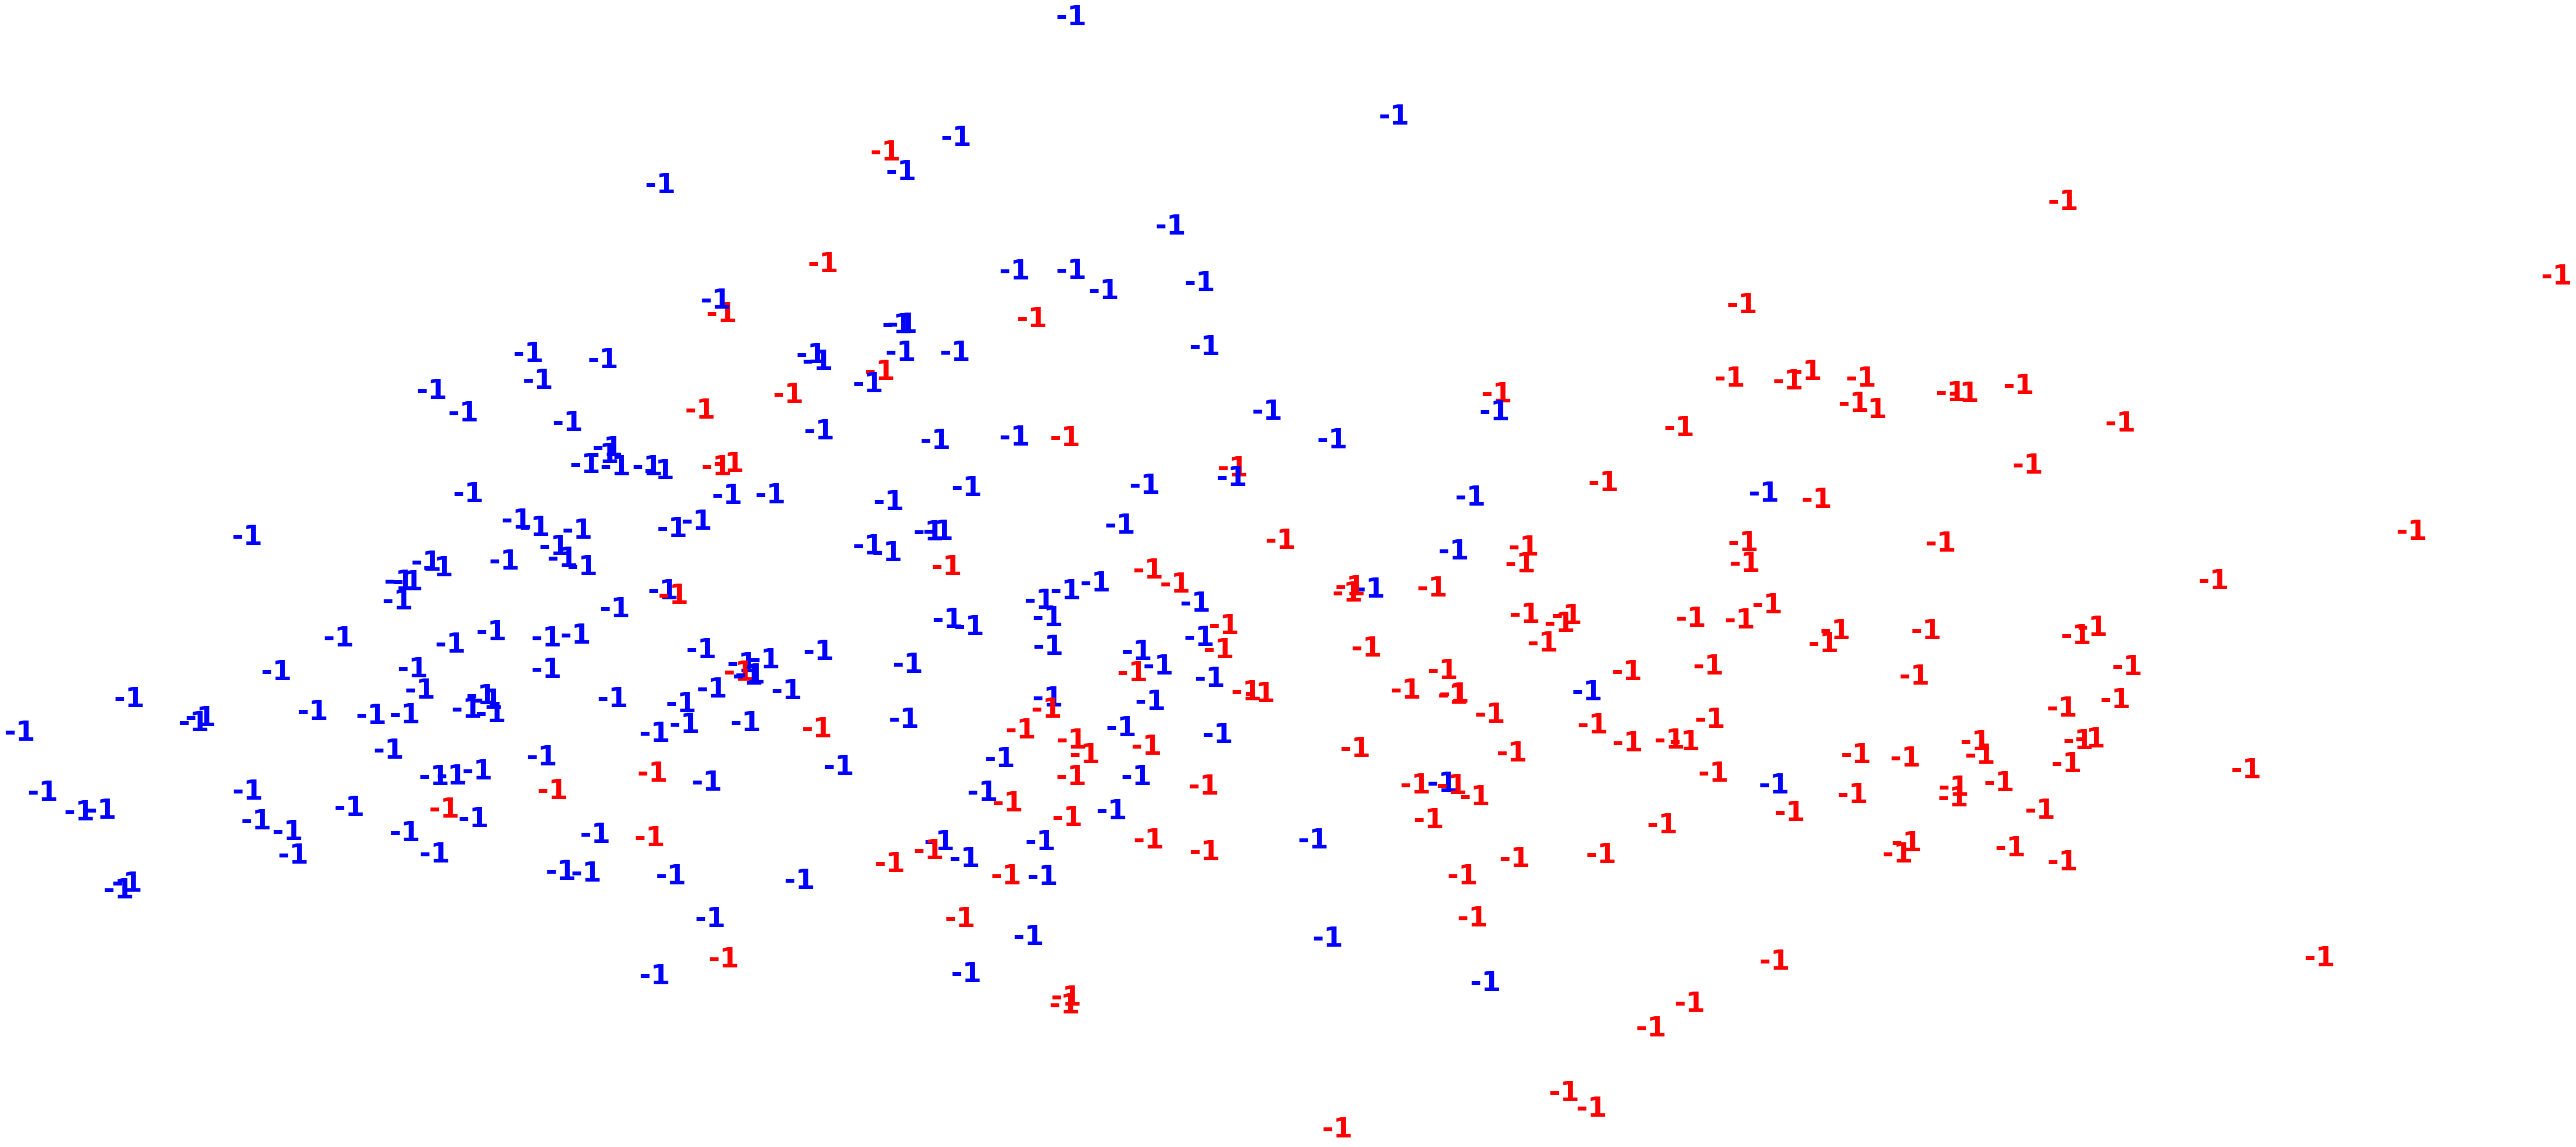

# of clusters:  1


In [13]:
#min_samples = 4
dbscan_cluster(1, 4, 'euclidean', X_std)

Increasing the number of min_samples reduces the number of clusters until there is only one cluster. However, we can see that every data point is labeled '-1'. Meaning that the minimum number of samples was so high that every data point is considered to be an outlier, and the entire 'cluster' is really all data points, labeled as outliers.

__3) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?__

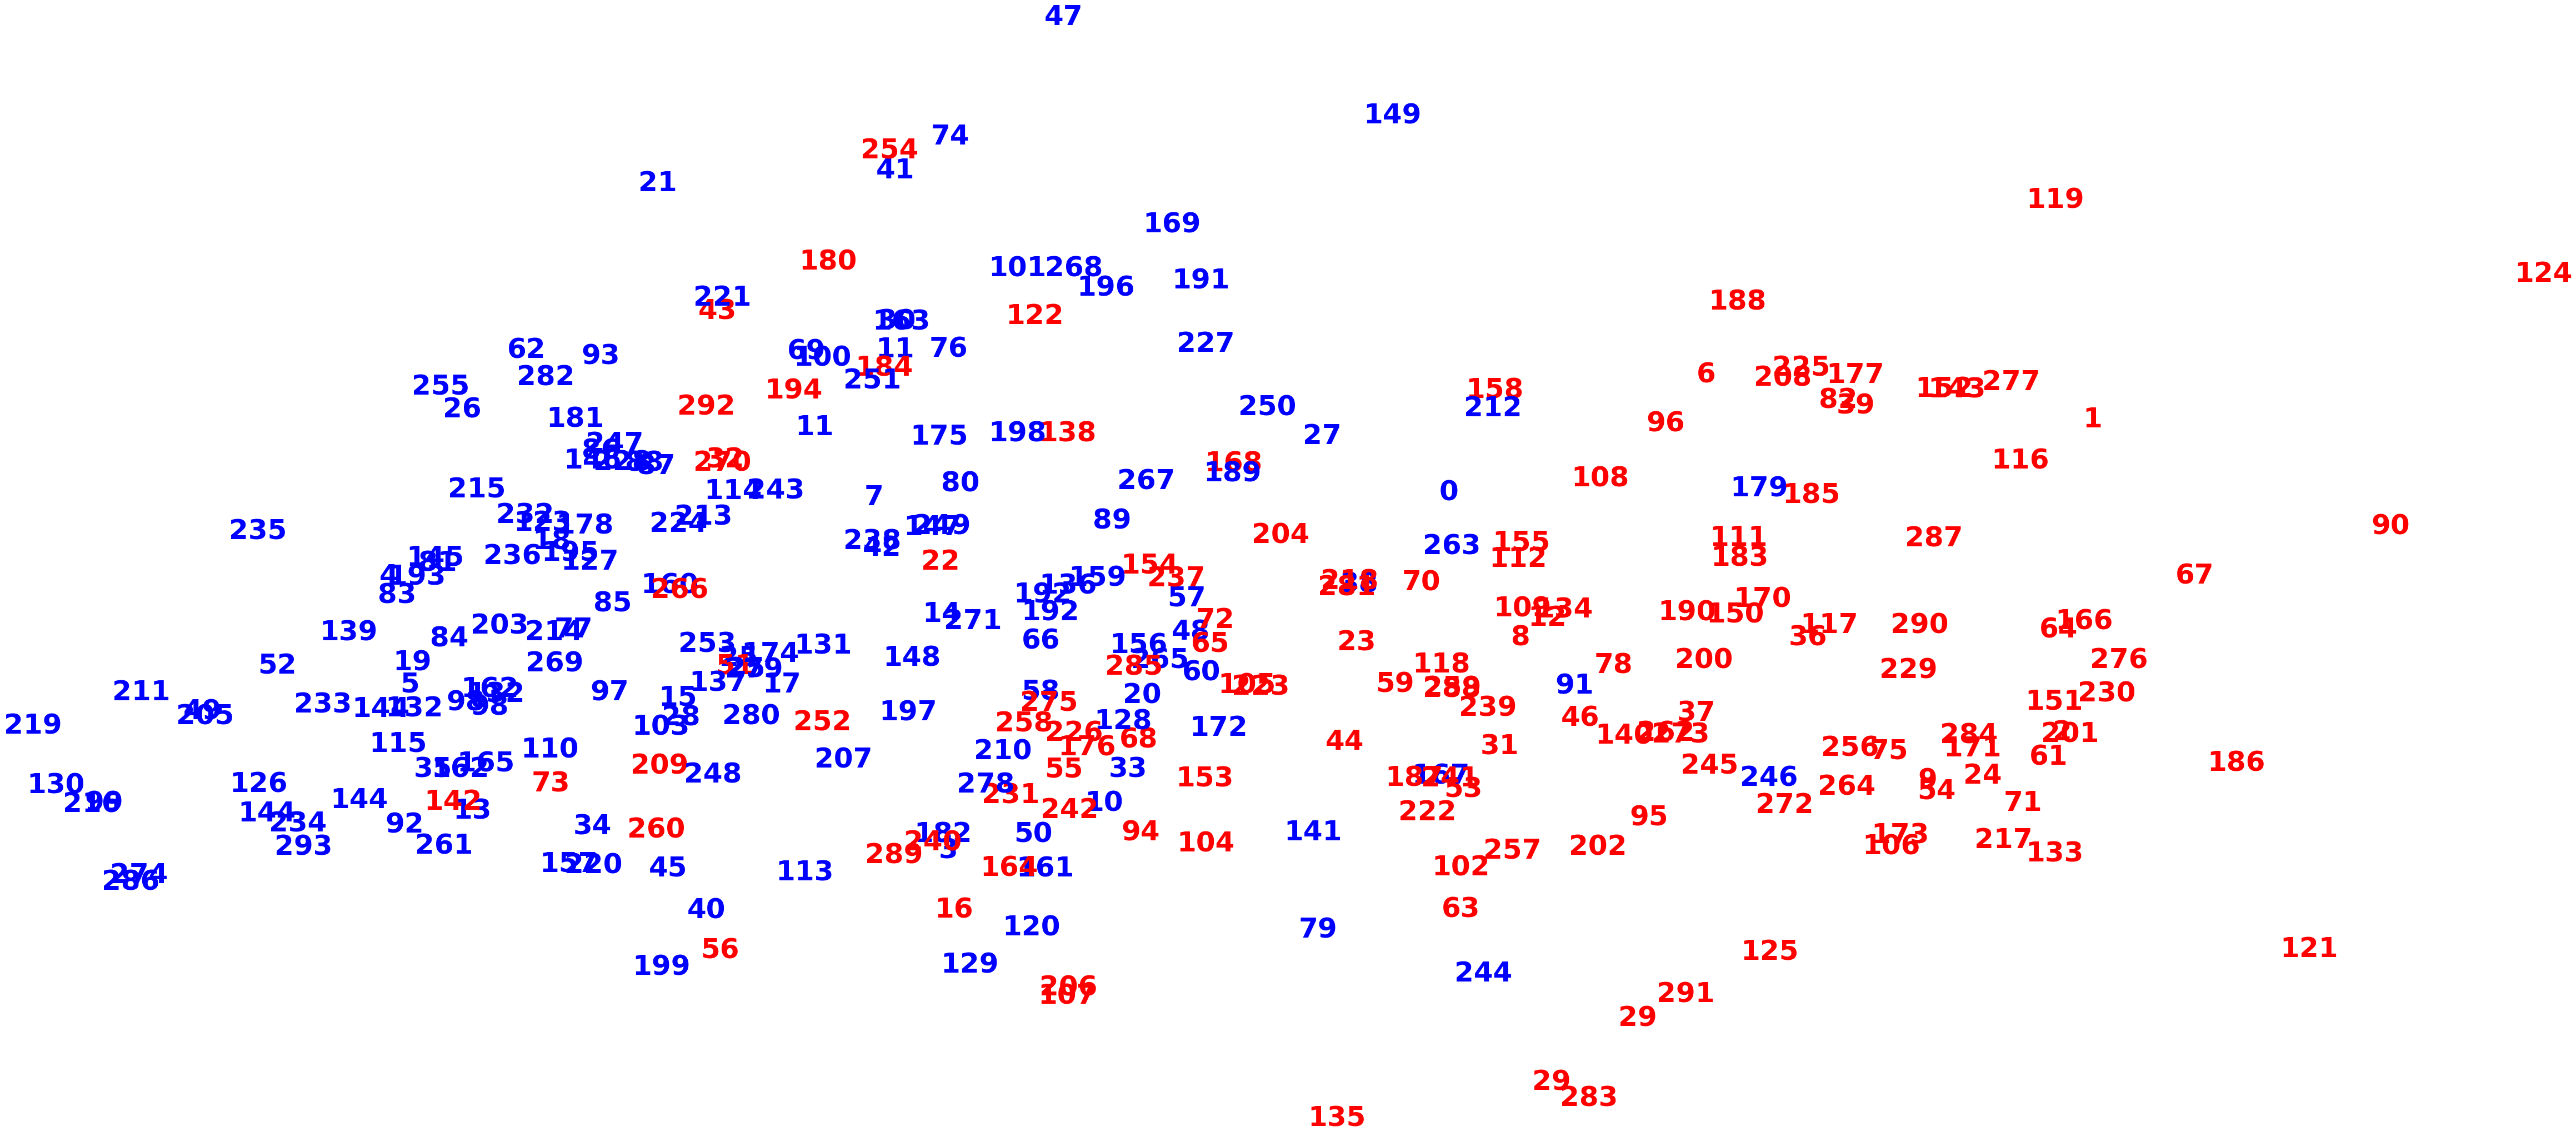

# of clusters:  294


In [14]:
#eps = 1, same as before
dbscan_cluster(1, 1, 'euclidean', X_std)

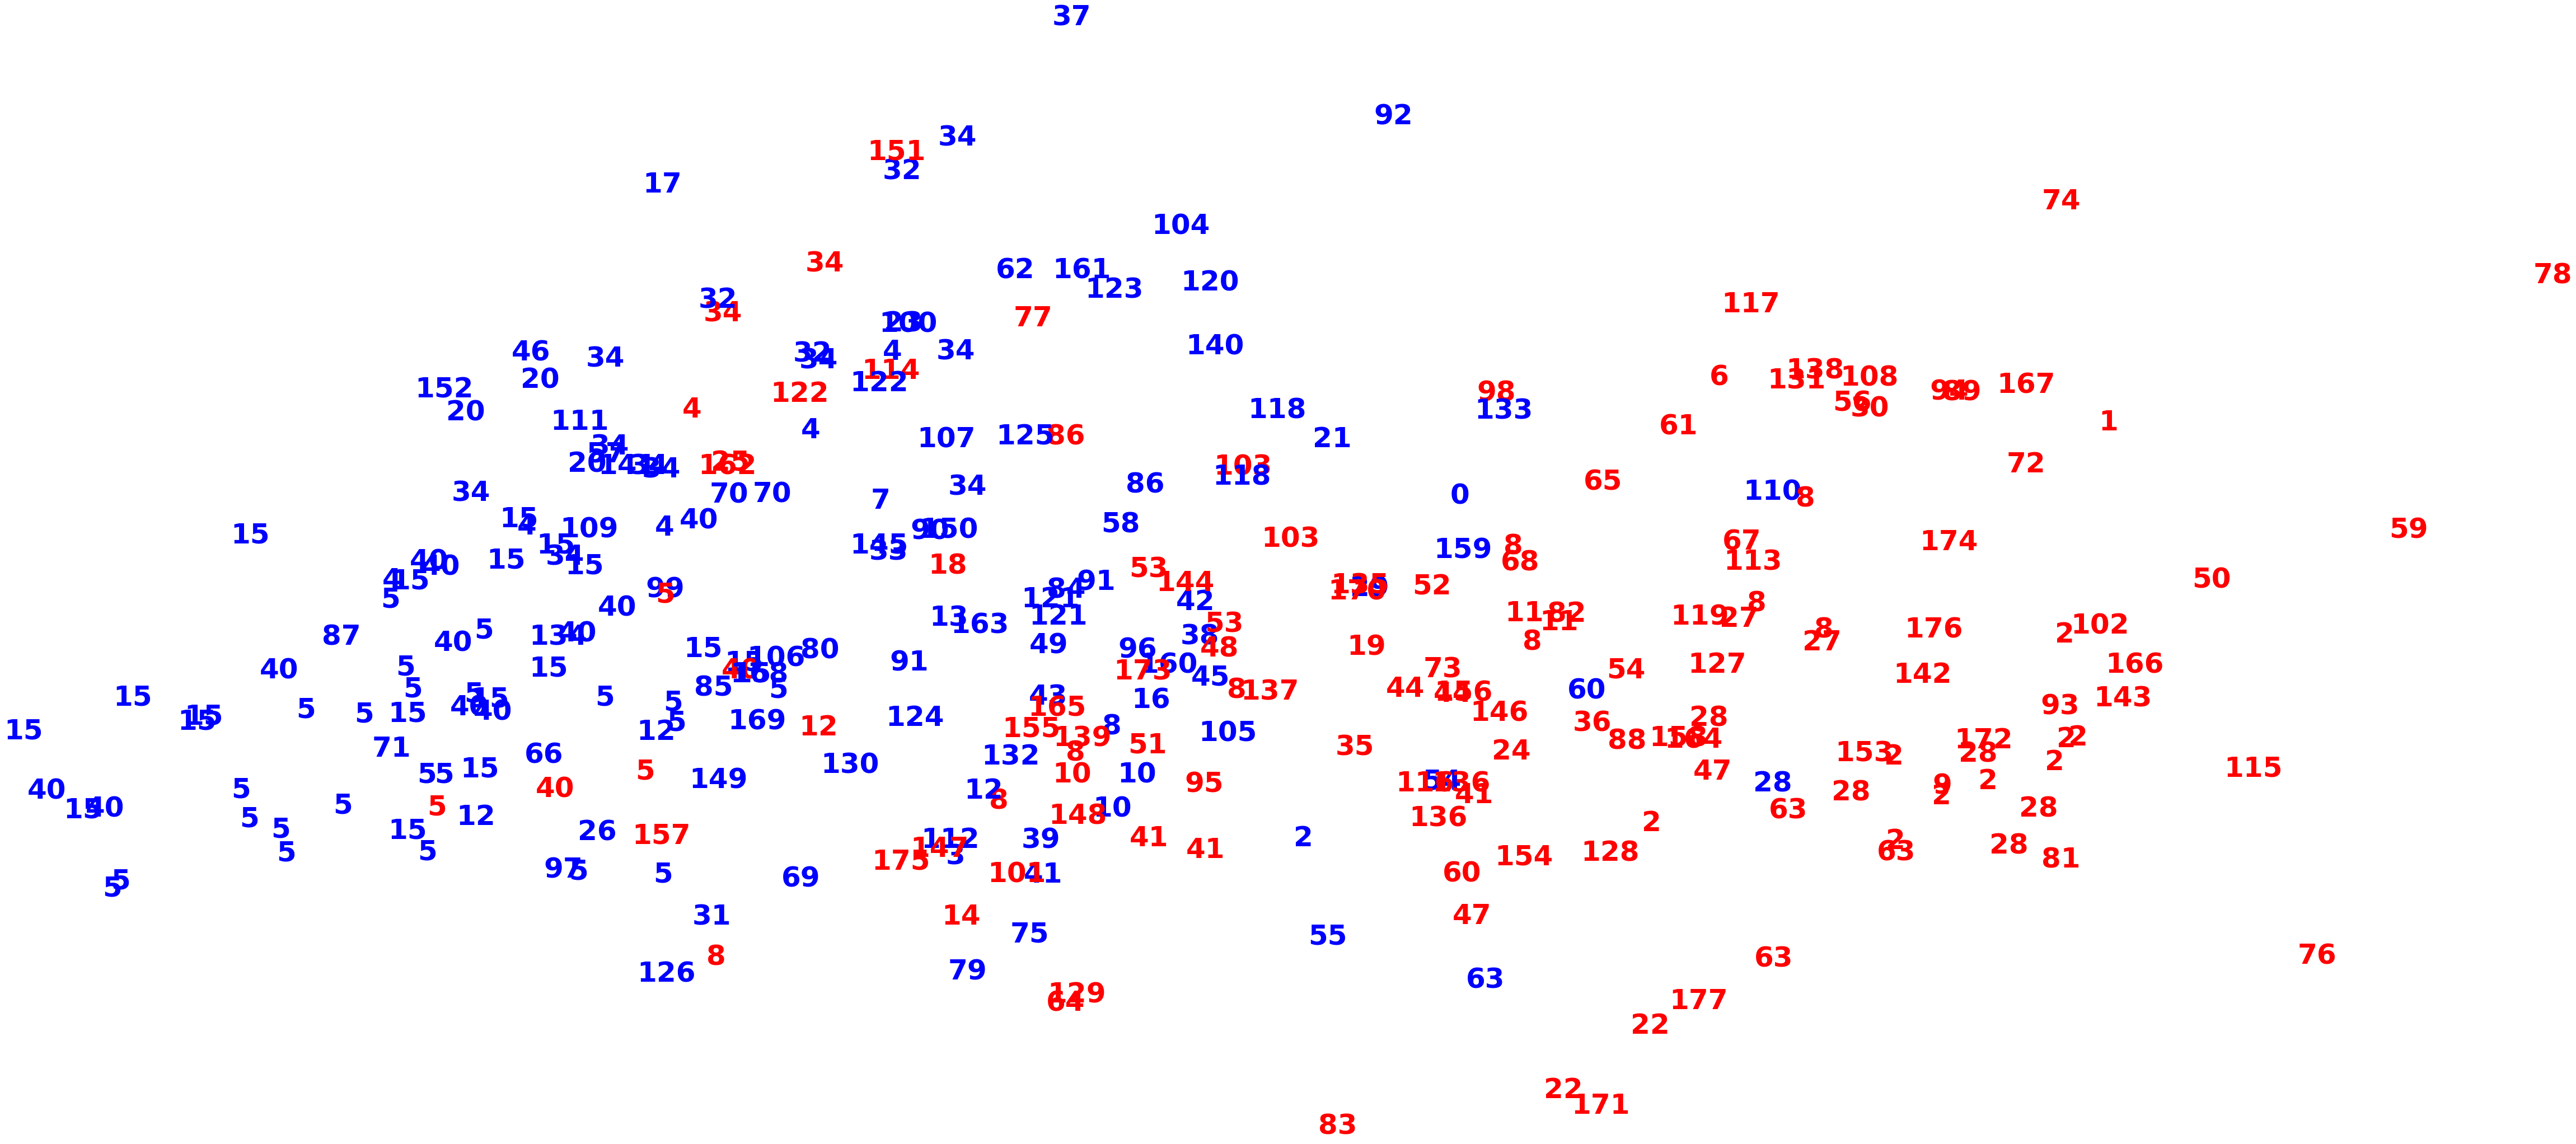

# of clusters:  178


In [15]:
#eps = 2
dbscan_cluster(2, 1, 'euclidean', X_std)

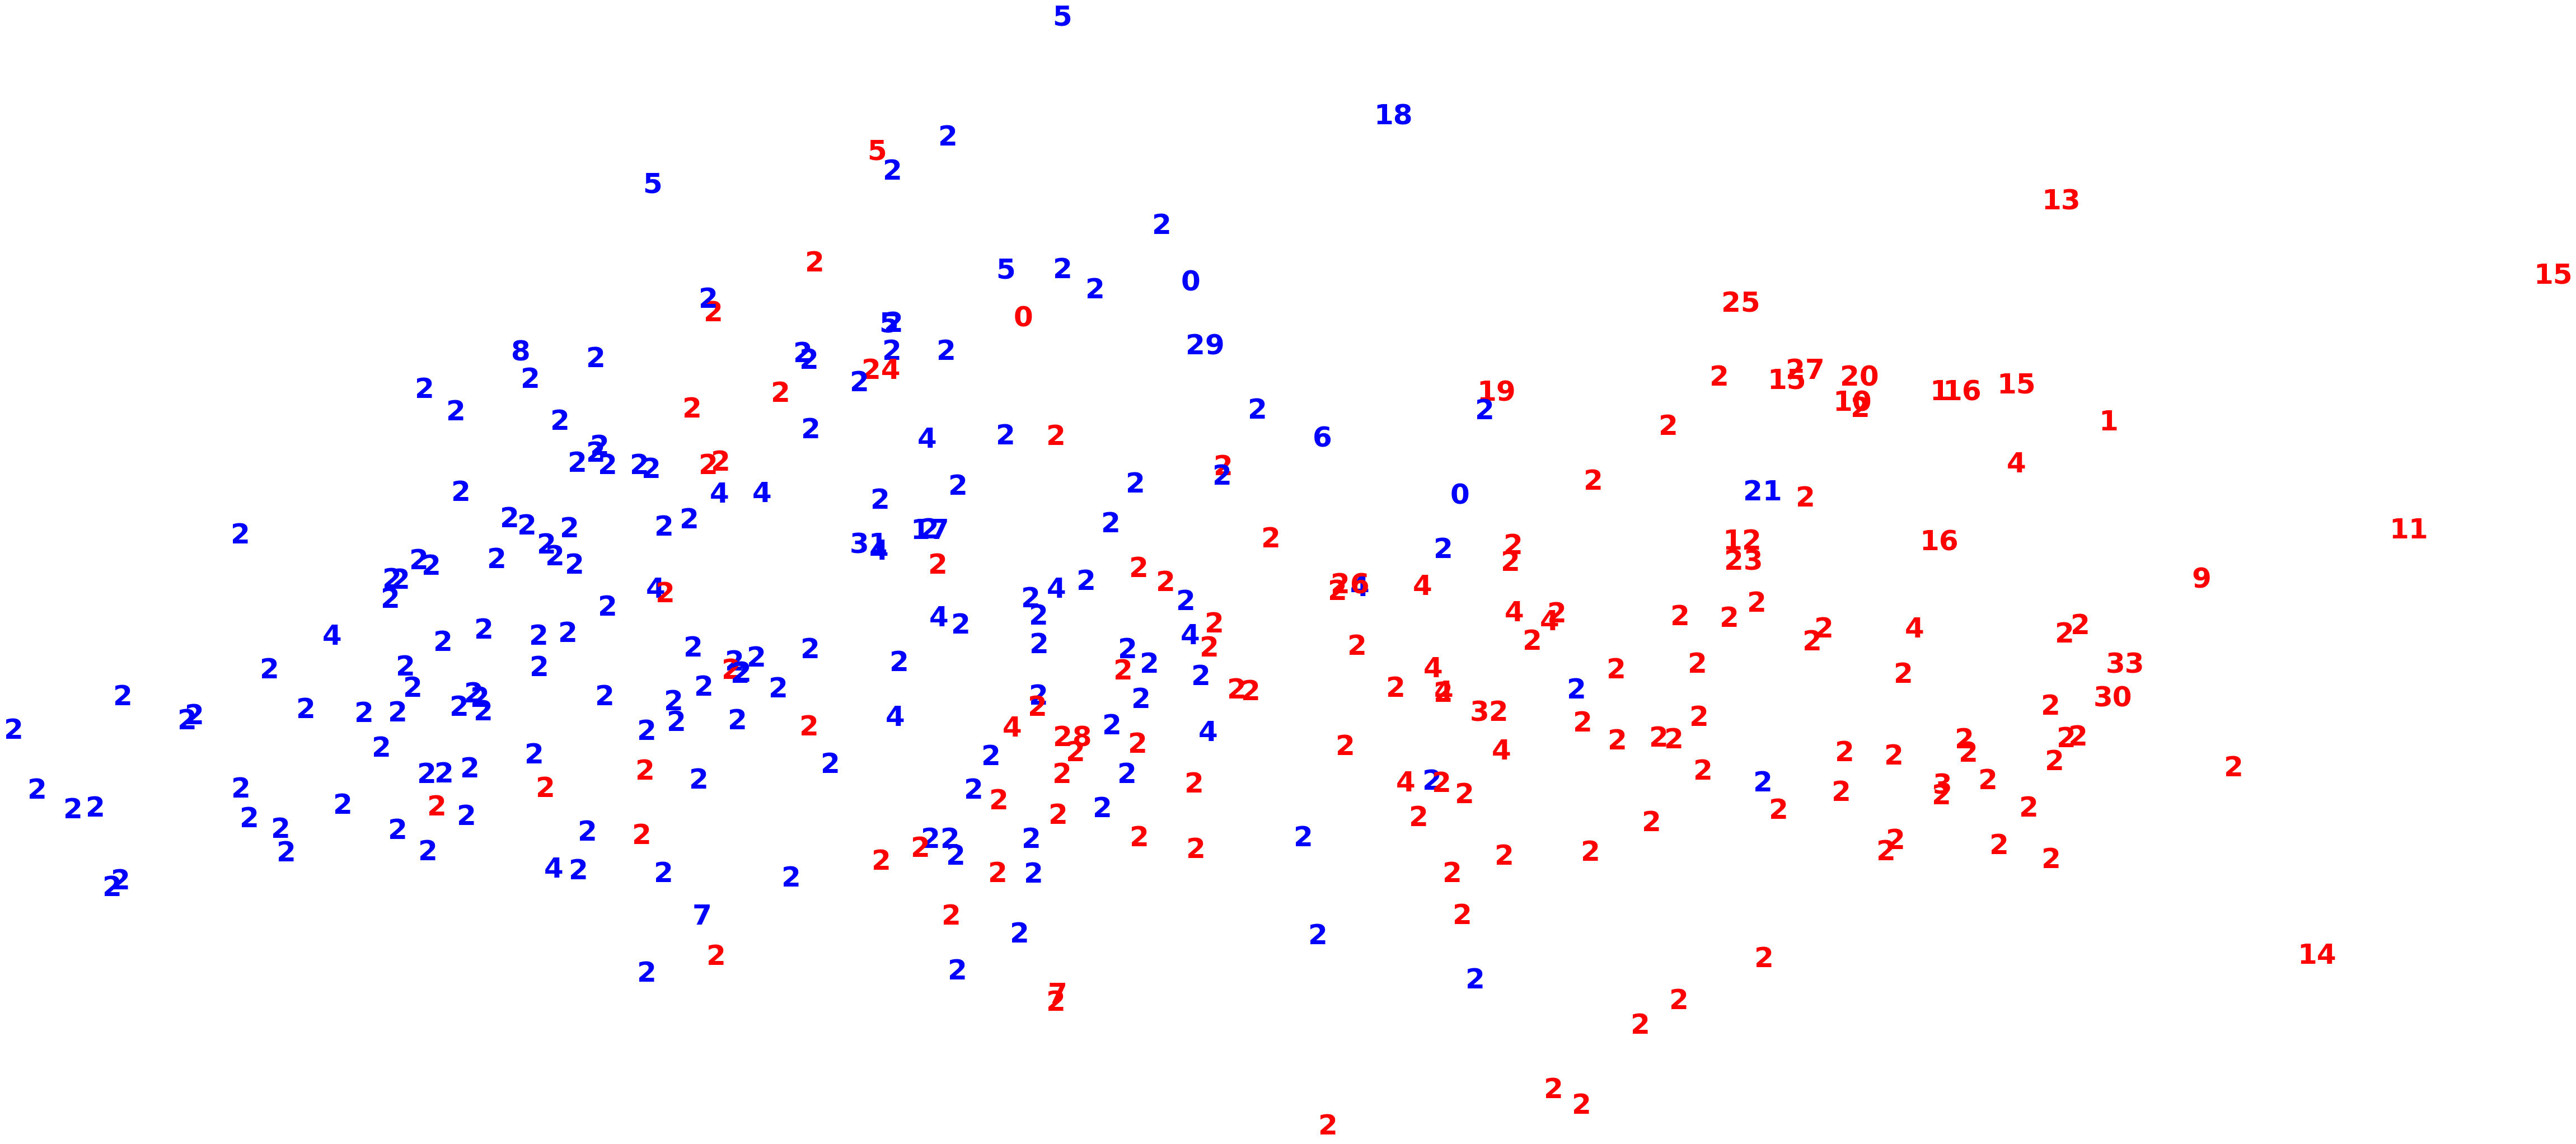

# of clusters:  34


In [16]:
#eps = 3
dbscan_cluster(3, 1, 'euclidean', X_std)

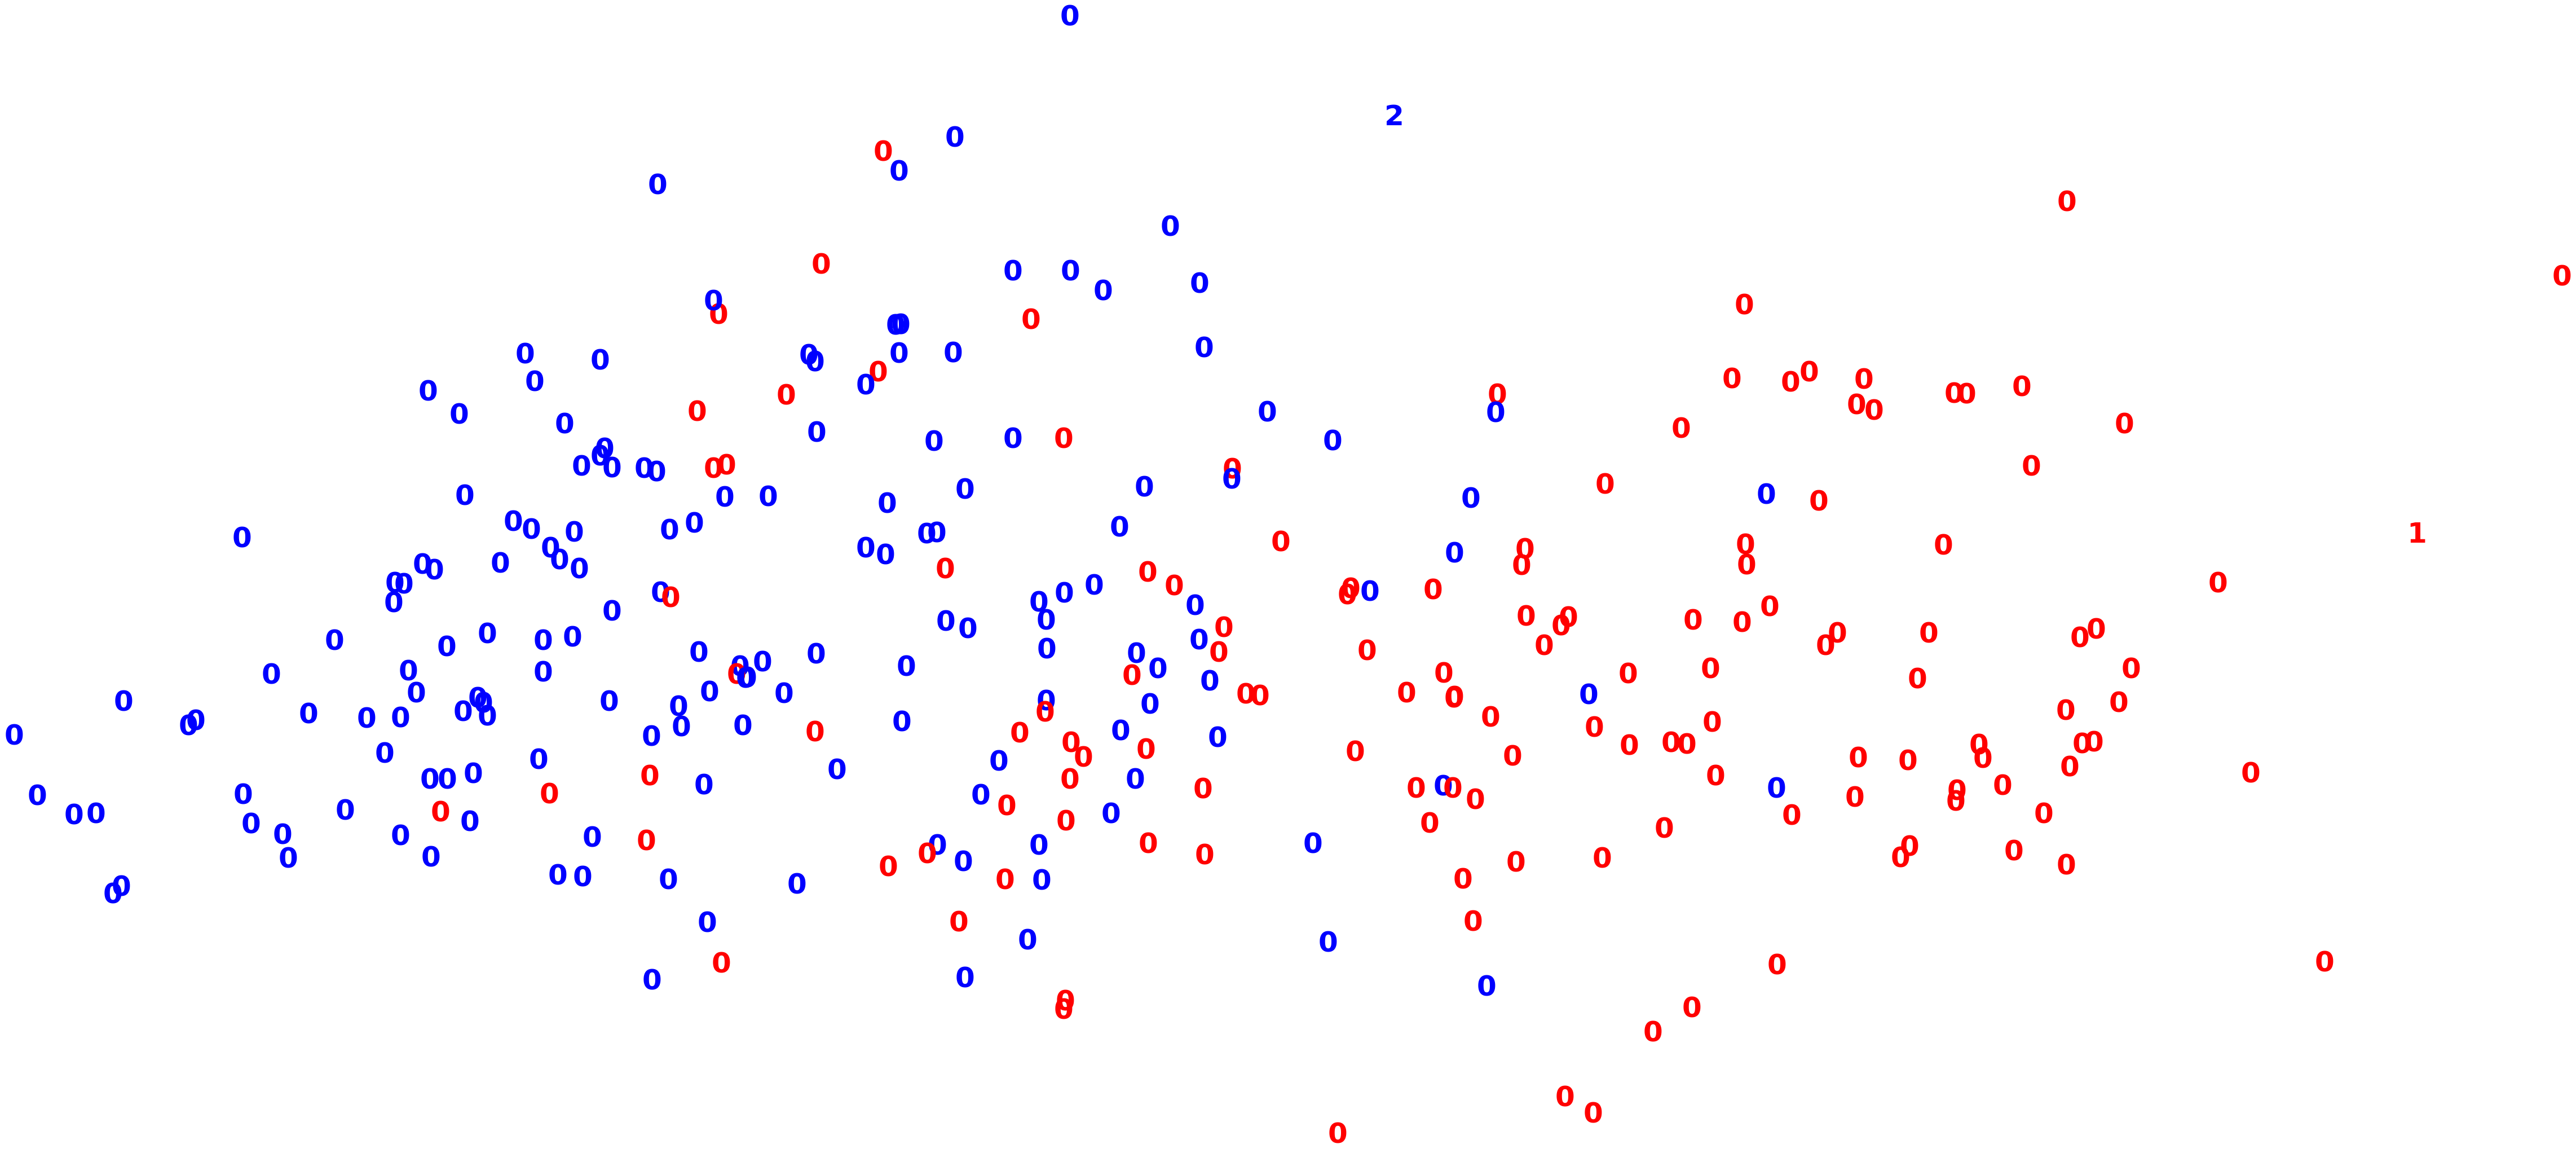

# of clusters:  3


In [17]:
#eps = 4
dbscan_cluster(4, 1, 'euclidean', X_std)

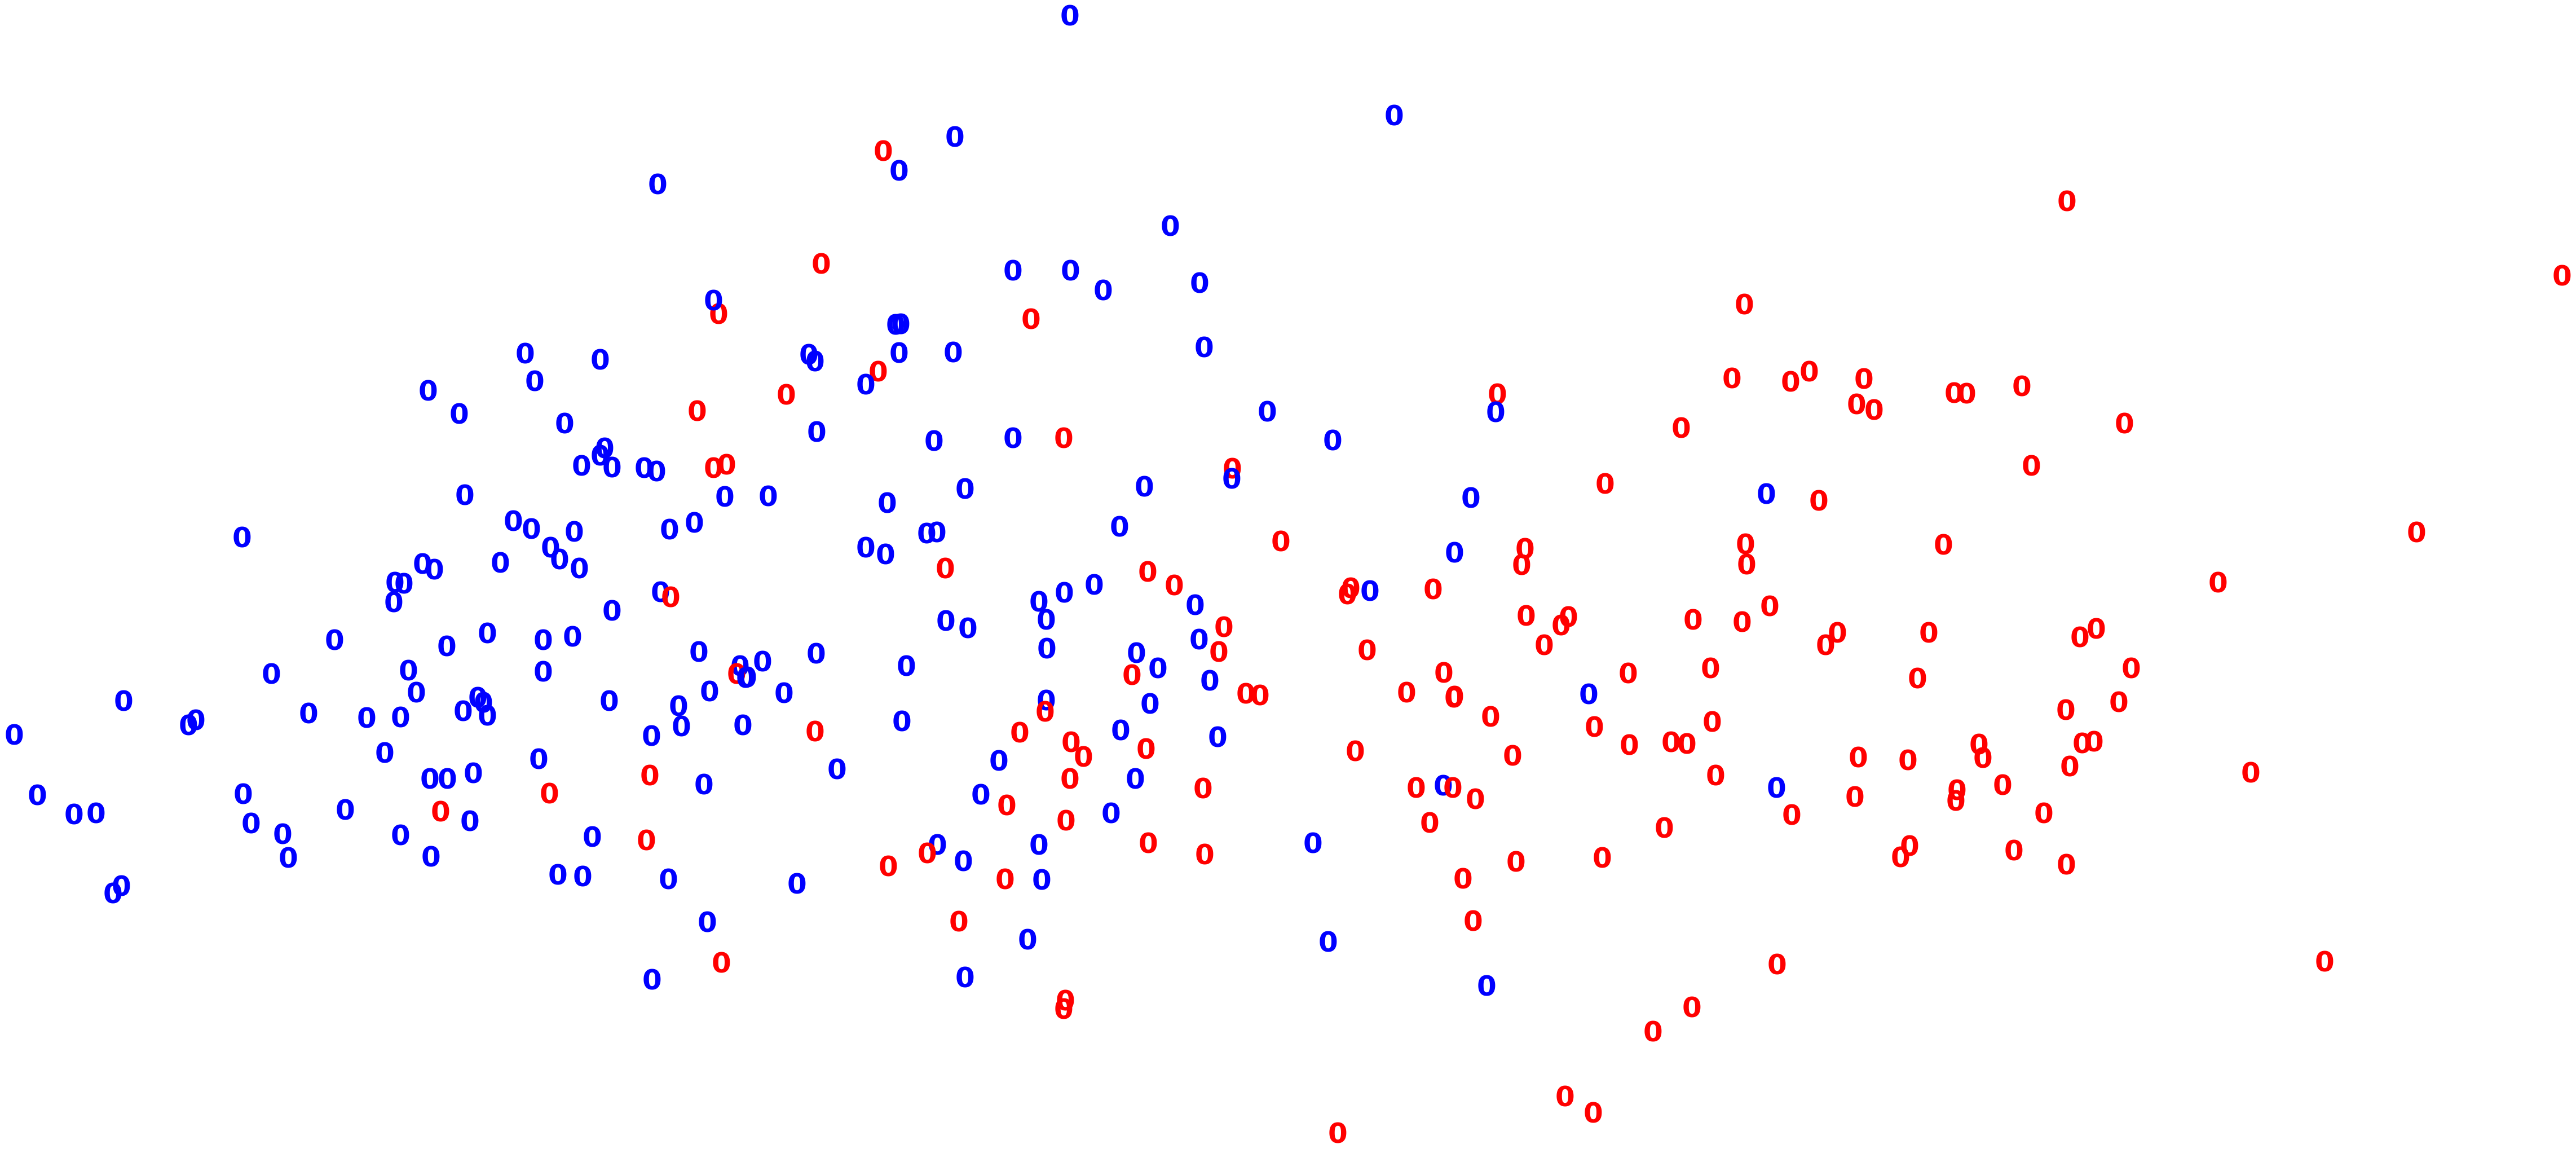

# of clusters:  1


In [18]:
#eps = 5
dbscan_cluster(5, 1, 'euclidean', X_std)

Increasing epsilon (eps) reduced the number of clusters. Eps is really the size of a radius. By increasing this size, more data points are included for each cluster, until the radius is large enough that each data point becomes connected (leaving one cluster).